<a href="https://colab.research.google.com/github/Kousikdutta1/Cardiovascular-Risk-Prediction/blob/main/Kousik_Dutta_Cardiovascular_Risk_Prediction_Capstone_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<u>Project Title : Cardiovascular Risk Prediction</u>**

##<b> Problem Description </b>

###<b>The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.</b>


## **Introduction**

**Cardiovascular diseases (CVDs) are the leading cause of death globally, according to WHO, an estimated 17.9 million people died from CVDs in 2019, accounting for 32% of all global fatalities. Though CVDs cannot be treated, predicting the risk of the disease and taking the necessary precautions and medications can help to avoid severe symptoms and in some cases, even death.
As a result, it is critical that we accurately predict the risk of heart disease in order to avoid as many fatalities as possible.**

**Here I will try to implement various machine learning algorithm to predict this classification problem. The content of the notebook includes :-**

* **Data Preparation**
* **Exploratory Data Analysis**
* **Data Preprocessing**
* **Machine Learning Model Implementation**



#**Data Preparation**

###**1. Importing the Libraries and the Dataset :**

**Let's Start Our Journey by Importing and Inspecting the Dataset**

In [2]:
# Importing Required Libraries for our analysis 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import make_scorer, recall_score, f1_score

from imblearn.combine import SMOTETomek

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To avoid unnecessary warnings, let's import warnings also
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Let's define url path of the dataset

path = '/content/drive/MyDrive/Colab Notebooks/Cardiovascular Risk Prediction - Kousik Dutta/Copy of data_cardiovascular_risk.csv'

# Now let's import dataset to create a dataframe

cvdf = pd.read_csv(path)

###**2. Understanding the Dataset**

In [4]:
# Let's check the shape of the dataframe

print('Shape of the dataset is :', cvdf.shape)

Shape of the dataset is : (3390, 17)


* **In our dataset we have 3390 rows and 17 columns.**

In [5]:
# Checking all the columns present in our dataset

cvdf.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [6]:
# Checking top 5 records in DataFrame

cvdf.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [7]:
# Checking bottom 5 records in DataFrame

cvdf.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [8]:
# Let's check the datatypes and null values of the dataset

cvdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [9]:
# Let's check the statistical description of the dataset

cvdf.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,3390.0,NaN,NaN,NaN,1694.5,978.753033,0.0,847.25,1694.5,2541.75,3389.0
age,3390.0,NaN,NaN,NaN,49.542183,8.592878,32.0,42.0,49.0,56.0,70.0
education,3303.0,NaN,NaN,NaN,1.970936,1.019081,1.0,1.0,2.0,3.0,4.0
sex,3390,2,F,1923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_smoking,3390,2,NO,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cigsPerDay,3368.0,NaN,NaN,NaN,9.069477,11.879078,0.0,0.0,0.0,20.0,70.0
BPMeds,3346.0,NaN,NaN,NaN,0.029886,0.170299,0.0,0.0,0.0,0.0,1.0
prevalentStroke,3390.0,NaN,NaN,NaN,0.00649,0.080309,0.0,0.0,0.0,0.0,1.0
prevalentHyp,3390.0,NaN,NaN,NaN,0.315339,0.464719,0.0,0.0,0.0,1.0,1.0
diabetes,3390.0,NaN,NaN,NaN,0.025664,0.158153,0.0,0.0,0.0,0.0,1.0


###**3. Data Description**

###**Demographic ▶**

* **Sex:** male or female("M" or "F")
* **Age:** Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous).
* **Education:** The level of education of the patient (categorical values - 1,2,3,4)

###**Behavioral ▶**

* **is_smoking:** whether or not the patient is a current smoker ("YES" or "NO").
* **Cigs Per Day:** the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette).

###**Medical( history ) ▶**

* **BP Meds:** whether or not the patient was on blood pressure medication (Nominal).
* **Prevalent Stroke:** whether or not the patient had previously had a stroke (Nominal).
* **Prevalent Hyp:** whether or not the patient was hypertensive (Nominal).
* **Diabetes:** whether or not the patient had diabetes (Nominal).

###**Medical(current) ▶**

* **Tot Chol:** total cholesterol level (Continuous).
* **Sys BP:** systolic blood pressure (Continuous).
* **Dia BP:** diastolic blood pressure (Continuous).
* **BMI:** Body Mass Index (Continuous).
* **Heart Rate:** heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values).
* **Glucose:** glucose level (Continuous)

###**Target variable ▶**
* **10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”).** 

###**4. Missing Value Analysis**

In [10]:
#  Let's check the total missing data 

cvdf.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

* **It can be seen from above that there are missing data in our dataset.**

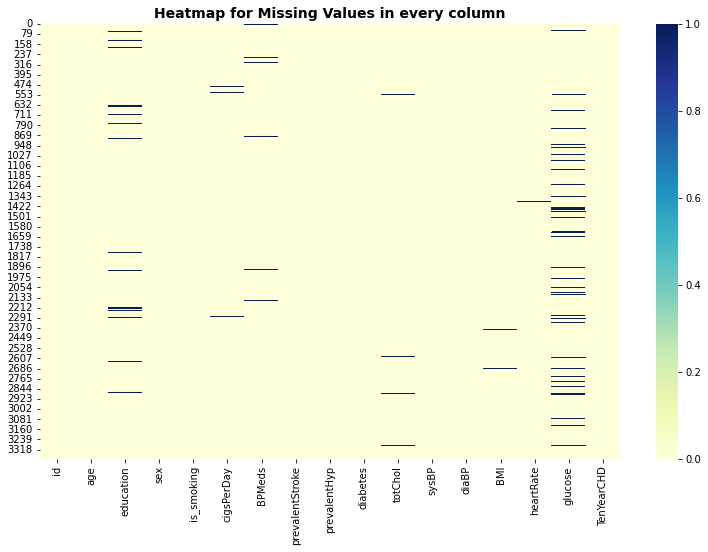

In [11]:
# Checking for missing values in our dataset with the help of heatmap.

plt.figure(figsize = (13,8))
sns.heatmap(cvdf.isnull(), cmap = 'YlGnBu')
plt.title('Heatmap for Missing Values in every column',weight = 'bold', fontsize = 14)
plt.show();


In [12]:
# Percentage of missing data per category

Total_missing_data = cvdf.isnull().sum().sort_values(ascending = False)
Total_percentage = (cvdf.isnull().sum() / cvdf.isnull().count()).sort_values(ascending = False) * 100
missing_data_concat = pd.concat([Total_missing_data, round((Total_percentage),2)], axis = 1, keys = ["Total No of Missing Values", "Percentage of Missing Values"])
missing_data = missing_data_concat[missing_data_concat['Total No of Missing Values']>0]
missing_data

,Total No of Missing Values,Percentage of Missing Values
glucose,304,8.97
education,87,2.57
BPMeds,44,1.30
totChol,38,1.12
cigsPerDay,22,0.65
BMI,14,0.41
heartRate,1,0.03


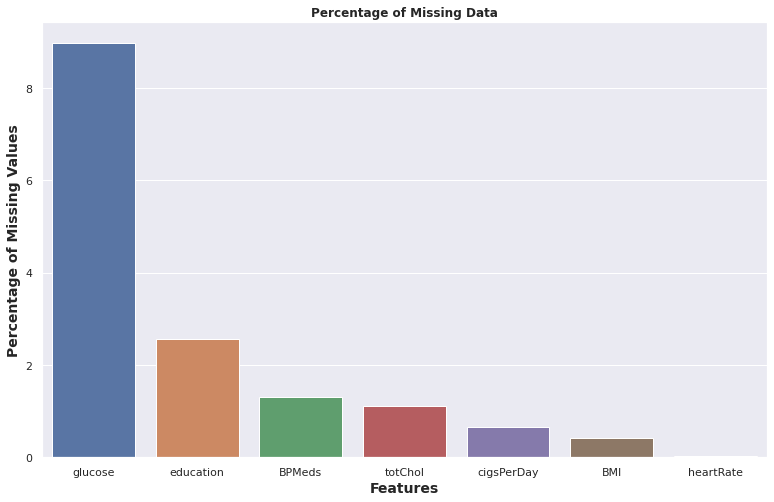

In [13]:
# Let's visualize the percentage of missing values

plt.figure(figsize = (13,8))
sns.set(style = 'darkgrid')
sns.barplot(x = missing_data.index, y = missing_data['Percentage of Missing Values'], data = missing_data)
plt.title('Percentage of Missing Data', weight = 'bold')
plt.xlabel('Features', fontsize = 14, weight = 'bold')
plt.ylabel('Percentage of Missing Values', fontsize = 14, weight = 'bold')
plt.show();


* **As we can see from above 'Glucose', 'Education', 'BPMeds' , 'totChol', 'CigsPerDay', 'BMI', 'Heartrate' - these features are having missing values. We will treat them as we go ahead in our analysis.**

In [14]:
# Total Number of Null Values

print("Total number of null values in the data set : "  , cvdf.isna().sum().sum())

# Let's count all the rows which contain missing values

count = 0
for i in cvdf.isna().sum(axis = 1) :
  if i>0 :
    count = count + 1
print('Total number of rows with missing values is ', count)
print(f'Percentage of rows which are having missing values in the entire datset : { round((count/ len(cvdf.index))*100, 2) } %')


Total number of null values in the data set :  510
Total number of rows with missing values is  463
Percentage of rows which are having missing values in the entire datset : 13.66 %


###**5. Handling Missing Data :**

In [15]:
# Let's first check the total number of unique values in every feature of the dataset

for i in cvdf.columns.tolist() :
  print(f"Total number of unique values in '{i}' is : ", cvdf[i].nunique())

Total number of unique values in 'id' is :  3390
Total number of unique values in 'age' is :  39
Total number of unique values in 'education' is :  4
Total number of unique values in 'sex' is :  2
Total number of unique values in 'is_smoking' is :  2
Total number of unique values in 'cigsPerDay' is :  32
Total number of unique values in 'BPMeds' is :  2
Total number of unique values in 'prevalentStroke' is :  2
Total number of unique values in 'prevalentHyp' is :  2
Total number of unique values in 'diabetes' is :  2
Total number of unique values in 'totChol' is :  240
Total number of unique values in 'sysBP' is :  226
Total number of unique values in 'diaBP' is :  142
Total number of unique values in 'BMI' is :  1259
Total number of unique values in 'heartRate' is :  68
Total number of unique values in 'glucose' is :  132
Total number of unique values in 'TenYearCHD' is :  2


**Let's replace the missing values in the categorical columns with the most frequent entries**

In [16]:
# Replacing the missing values in the categorical columns with its mode

cvdf['education'] = cvdf['education'].fillna(cvdf['education'].mode()[0])
cvdf['BPMeds'] = cvdf['BPMeds'].fillna(cvdf['BPMeds'].mode()[0])


In [17]:
# Let's check for the missing values in the categorical columns

print("Total missing values in column 'Education' after Mode imputation : " , cvdf['education'].isna().sum())

print("Total missing values in column 'BPMeds' after Mode imputation : " ,    cvdf['BPMeds'].isna().sum())

Total missing values in column 'Education' after Mode imputation :  0
Total missing values in column 'BPMeds' after Mode imputation :  0


**Let's check the distributions of the continuous variables and impute the missing values with mean or median**

In [18]:
# Let's first assign the variable names containing missing values

missing_cont_var = ['glucose', 'totChol', 'cigsPerDay', 'BMI', 'heartRate' ]

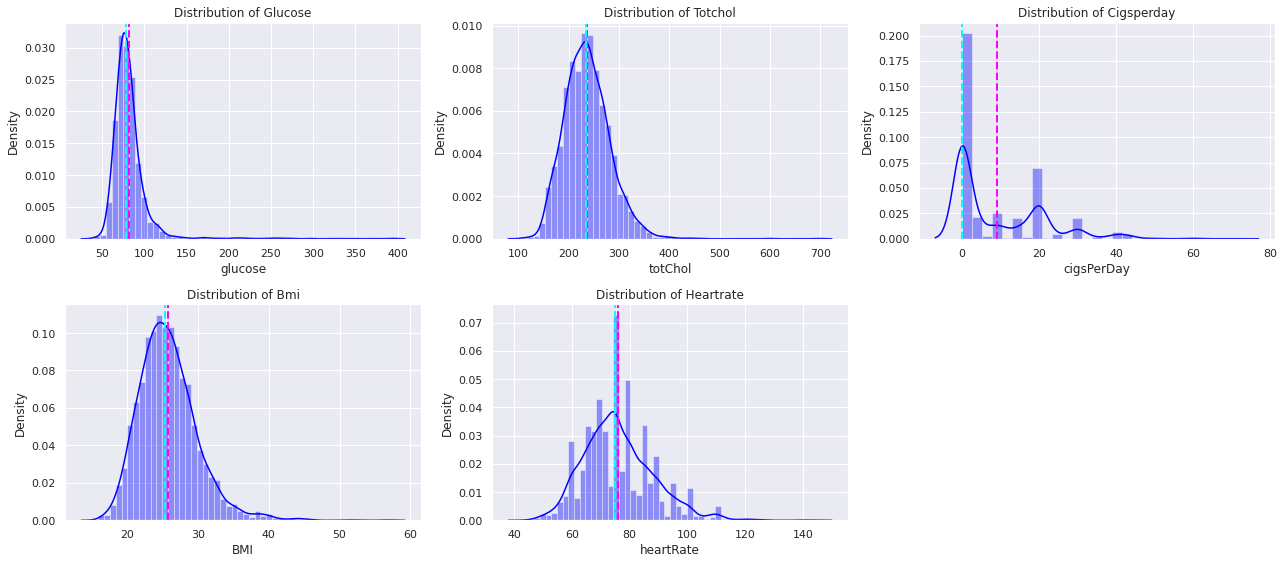

In [19]:
# Let's visualize the distribution plot of variables which contains missing values


fig = plt.figure(figsize = (18,8))
for index,column in enumerate(missing_cont_var) :
  plt.subplot(2,3,index+1)
  sns.distplot(cvdf[column], color = 'blue')
  feature = cvdf[column]
  ax = fig.gca()
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(f'Distribution of {column.title()}')
  plt.tight_layout()

**As we can see from above that almost all the plots are skewed , so it would be better if we impute missing values with the help of median.**

In [20]:
# Let's replace the missing values with the help of median

for column in missing_cont_var :
  cvdf[column] = cvdf[column].fillna(cvdf[column].median())

In [21]:
# Let's check for missing values

cvdf.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

**As we can see we have successfully handled all the missing values in the dataset**




#**Exploratory Data Analysis**

## **Let's do univariate analysis on different columns :**


**<u>' TenYearCHD ' - Dependent Variable**<u>

In [22]:
# Checking the value counts of the dependent variable

print("Vlaue count of 'TenYearCHD' :")
print("_ _"*20)
print('\n')
cvdf['TenYearCHD'].value_counts()

Vlaue count of 'TenYearCHD' :
_ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ _




0    2879
1     511
Name: TenYearCHD, dtype: int64

* **1 = Person have risk of coronary heart disease**


* **0 = Person do not have risk of coronary heart disease**

**There are 2879 patients without heart disease and 511 patients with the heart disease**




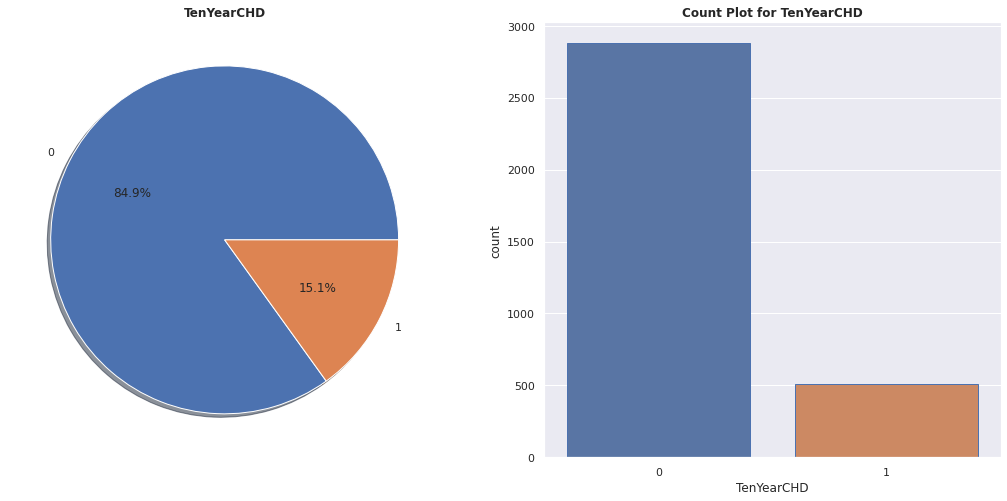

In [23]:
# Let's visualize the Target variable 


fig,axes = plt.subplots(1,2, figsize = (18,8))
cvdf['TenYearCHD'].value_counts().plot.pie(autopct = '%1.1f%%', ax = axes[0], shadow = True)
sns.countplot('TenYearCHD', data = cvdf, ax = axes[1], edgecolor = 'b')
axes[0].set_title('TenYearCHD', weight = 'bold')
axes[0].set_ylabel('')
axes[1].set_title('Count Plot for TenYearCHD', weight = 'bold')
plt.show();


* **As we can see from above that we have the imbalanced data set where number of people without the risk of coronary heart disease majorly exceeds the number of people those are having the risk of disease**

In [24]:
# Let's first drop the 'ID' column 

cvdf.drop(columns = ['id'], inplace = True)

**Let's check the discrete and continuous features :**

In [25]:
# Let's create to variables containing 'Categorical' and 'Numerical' features

Categorical_features = [i for i in cvdf.columns if cvdf[i].nunique() <= 4]
Numerical_features = [i for i in cvdf.columns if cvdf[i].nunique() > 4 ]

print(f'categorical features are : {Categorical_features}')
print(f'Numerical features are : {Numerical_features}')

categorical features are : ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
Numerical features are : ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


### **Let's analyze the distribution of the continuous independent features**

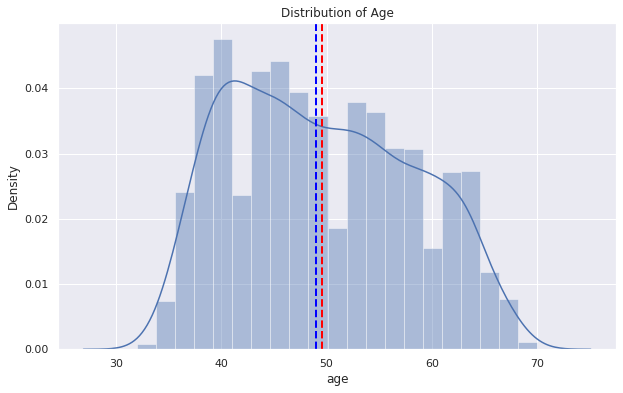

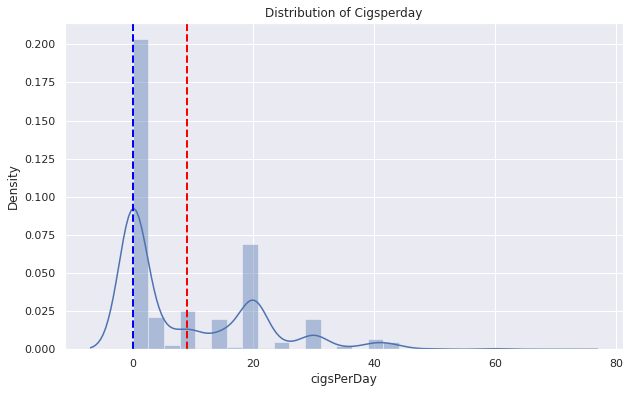

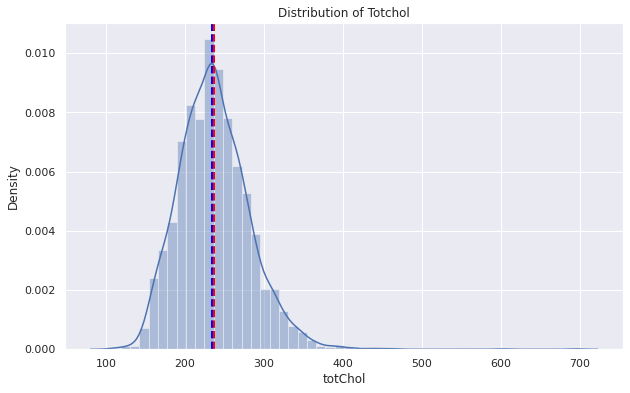

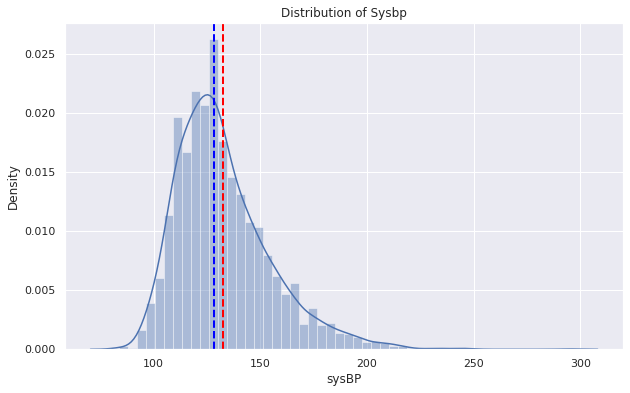

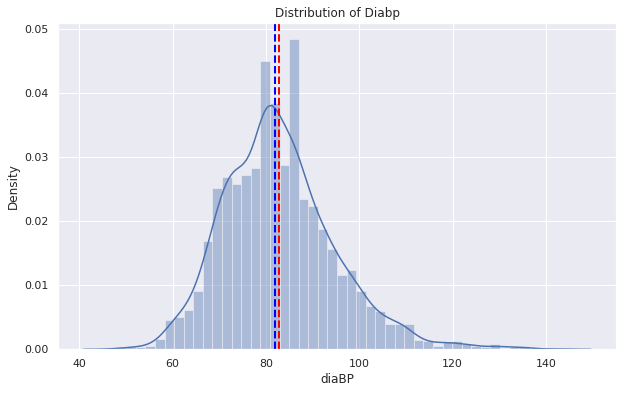

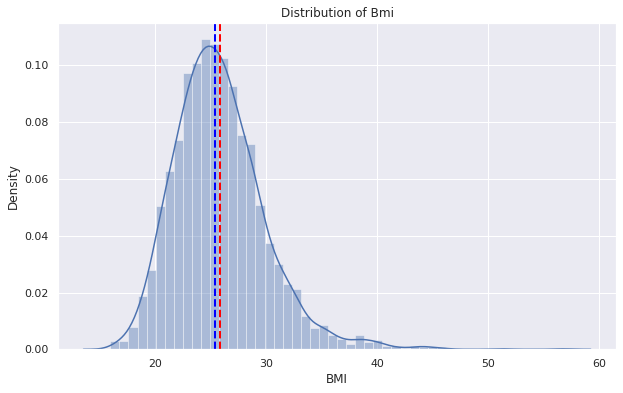

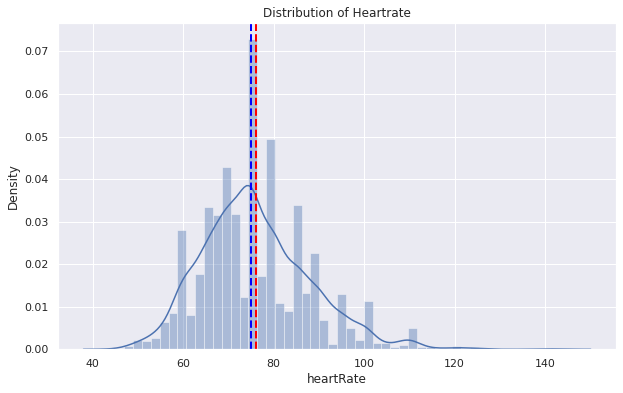

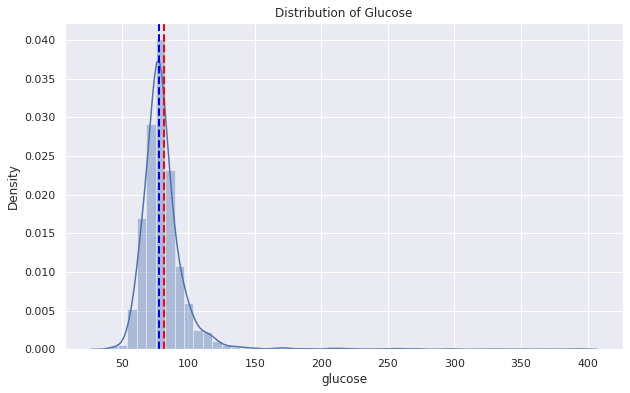

In [26]:
# Analyzing the distribution of the numerical features from the dataset

for column in Numerical_features :
  plt.figure(figsize=(10,6))
  sns.distplot(cvdf[column])
  plt.axvline(cvdf[column].mean(), color = 'red', linestyle = 'dashed', linewidth = 2)
  plt.axvline(cvdf[column].median(), color = 'blue', linestyle = 'dashed', linewidth =2)
  plt.title (f'Distribution of {column.title()}')
  plt.show();

* **As we can see from above plots that some of the variable are having skewed distribution , outliers needed to be treated for better analysis.**

###**Let's analyze the distribution of the Categorical independent features**

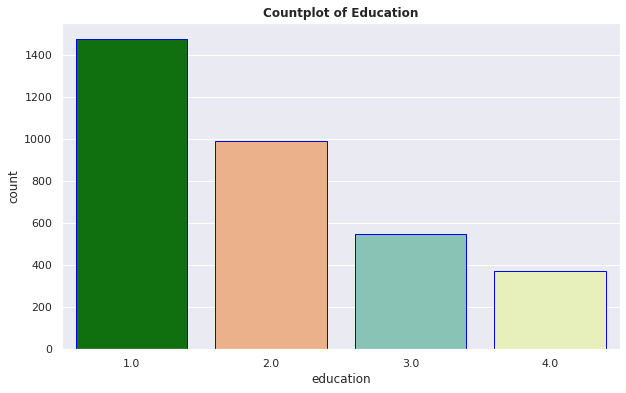

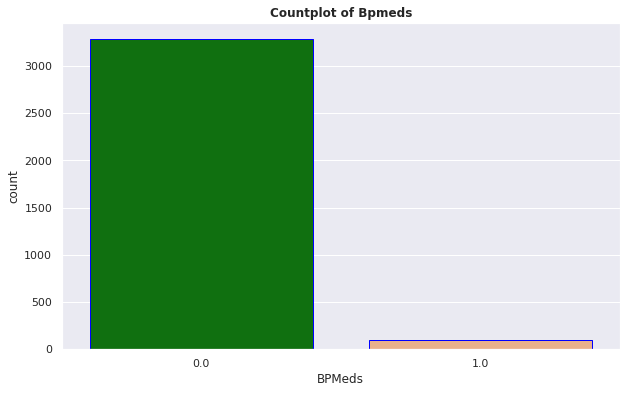

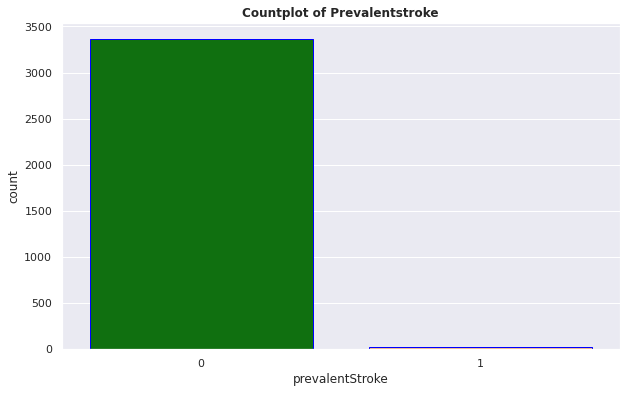

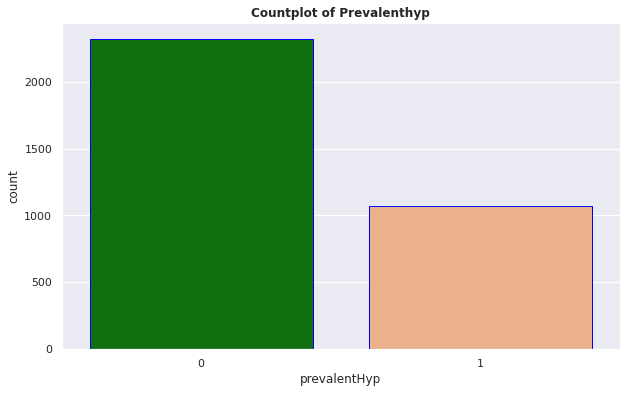

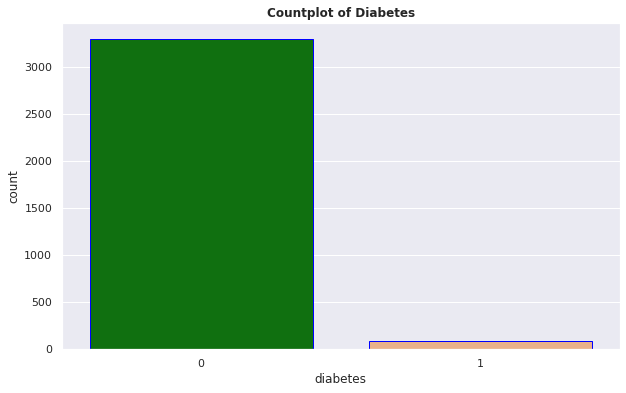

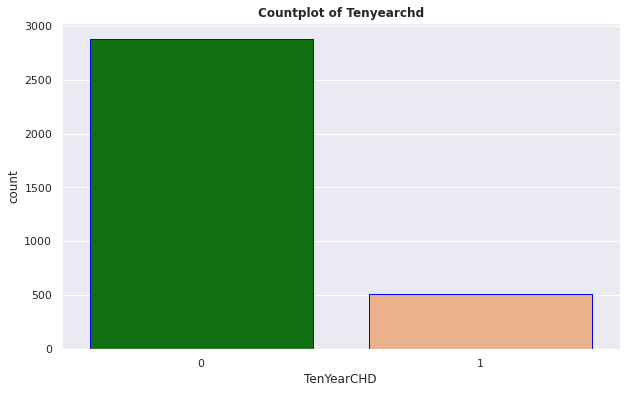

In [27]:
# Analyzing the distribution of the Categorical features from the dataset

for column in [i for i in Categorical_features if i not in ['sex', 'is_smoking']] :
  plt.figure(figsize=(10,6))
  sns.countplot( cvdf[column], edgecolor = 'blue',palette = ["green","#FAAE7B","#7fcdbb","#edf8b1"])
  plt.title (f'Countplot of {column.title()}', weight = 'bold')
  plt.show();

###**Handling Outliers**

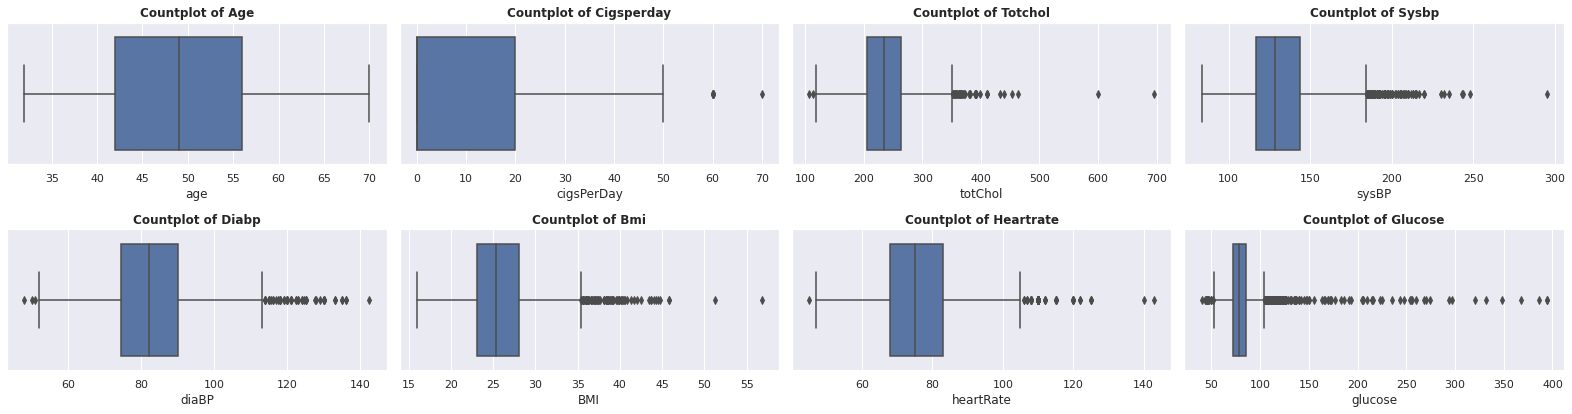

In [28]:
# Analyzing outliers of the Numerical features with the help of box plot

plt.figure(figsize = (22,14))
for index, column in enumerate(Numerical_features) :
  plt.subplot(5,4,index+1)
  sns.boxplot(cvdf[column])
  plt.title (f'Countplot of {column.title()}', weight = 'bold')
  plt.tight_layout()
plt.show();


* **As we can see from above plots that there are outliers in our dataset, so we will be treating them.**

In [29]:
# Removing outliers by standard methods

cv_df = cvdf.copy()
for column in Numerical_features :
  q1, q3, median = cv_df[column].quantile([0.25,0.75,0.5])
  lower_limit = q1 - 1.5 * (q3 - q1)
  upper_limit = q3 + 1.5 * (q3 - q1)

# Replacing outliers with median value
  cv_df[column] = np.where (cv_df[column] > upper_limit, median, 
                  np.where(cv_df[column] < lower_limit , median, cv_df[column]))


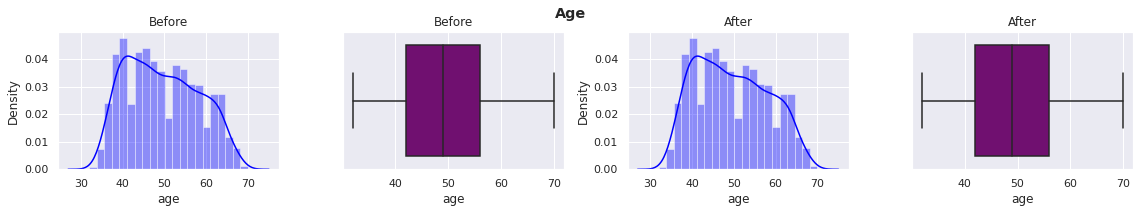

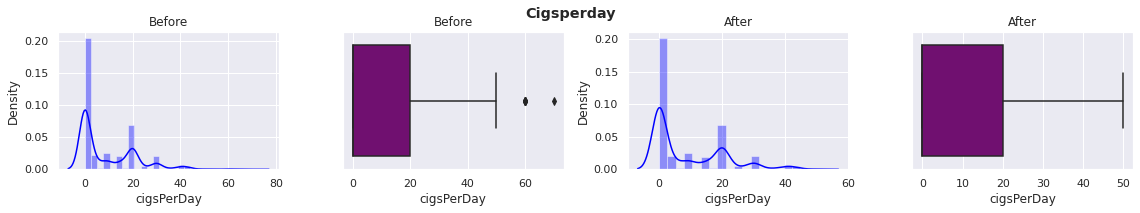

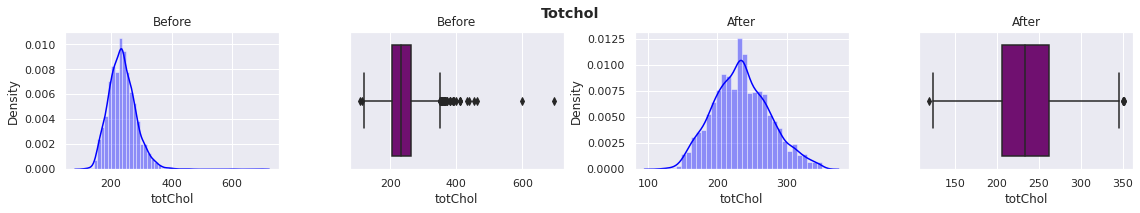

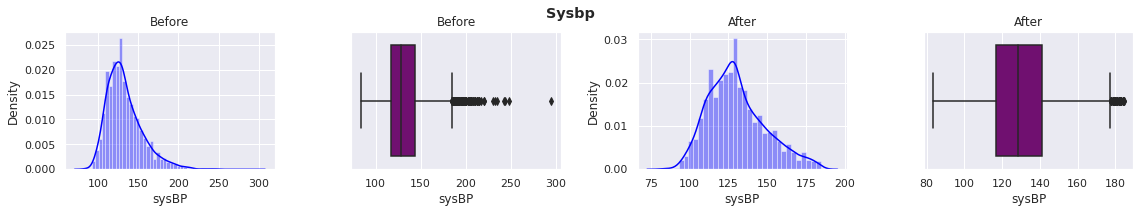

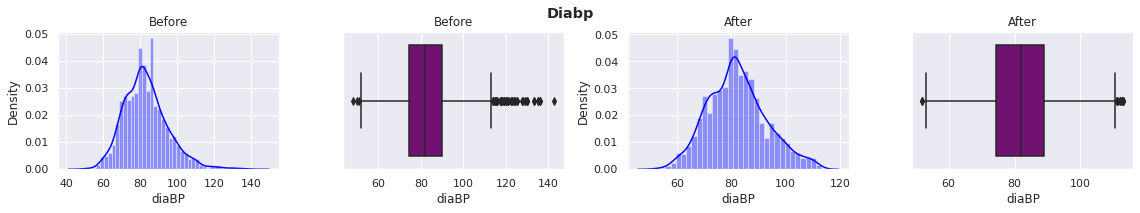

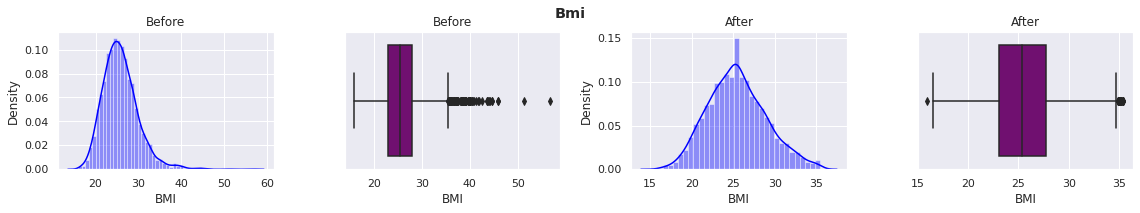

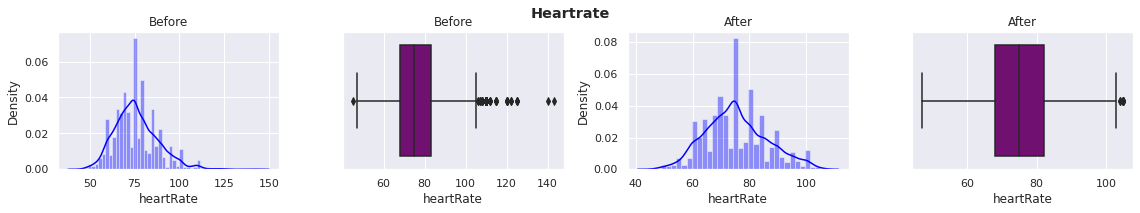

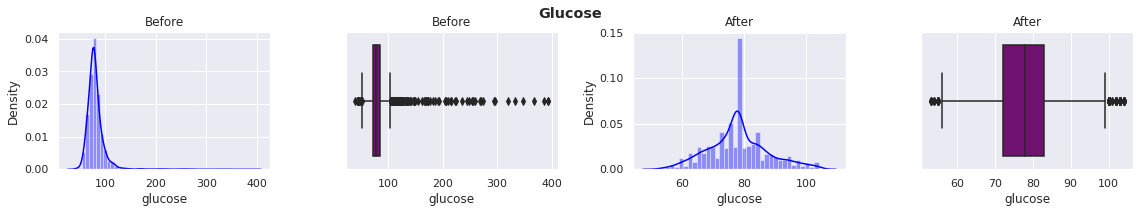

In [30]:

# Let's plot graphs before and after the outlier treatment

for column in Numerical_features :
  fig, axes = plt.subplots(1, 4, figsize= (16,3) )
  sns.distplot(cvdf[column], ax = axes[0], color = 'blue').set(title = 'Before')
  sns.boxplot(cvdf[column], ax = axes[1], color = 'purple').set(title = 'Before')
  sns.distplot(cv_df[column], ax = axes[2], color = 'blue').set(title = 'After')
  sns.boxplot(cv_df[column], ax = axes[3], color = 'purple').set(title = 'After')
  plt.suptitle(f'{column.title()}',weight='bold')
  plt.tight_layout()
  fig.show()

 * **As we can see from above that we have successfully treated the outliers in the numerical features.**

###**Let's convert categorical variables to numerical varibales - 'Label Encoding'**

In [31]:
# Defining Label encoder based on categorical column 'sex', 'is_smoking'


label_encoding = {'sex' : {'M': 1, 'F': 0}, 'is_smoking' : {'YES' : 1, 'NO' : 0}}

cv_df = cv_df.replace(label_encoding)

In [32]:
# Let's check the dataset after transformation

cv_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64.0,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36.0,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46.0,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50.0,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64.0,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [33]:
# Let's check the datatype of different features

cv_df.dtypes.reset_index().rename(columns = {'index' : 'Feature', 0 :'Datatype'})


,Feature,Datatype
0,age,float64
1,education,float64
2,sex,int64
3,is_smoking,int64
4,cigsPerDay,float64
5,BPMeds,float64
6,prevalentStroke,int64
7,prevalentHyp,int64
8,diabetes,int64
9,totChol,float64


**As it can be seen from above that all the features of the dataset has been converted to 'int' or 'float' type.**

###**Checking Duplicates**

In [34]:
# Let's check if any duplicate is present

cv_df.duplicated().sum()

0

**As it can be seen from above that there are no duplicate value present in our dataset.**

###**Univariate analysis**

In [35]:
# Let's assign all the columns in one variable 

independent_variable = cv_df.columns

In [36]:
# Checking the value counts of categorical features

for i in Categorical_features :
  
  print('\n')
  print(f'Value count for the feature : {i}')
  print (cv_df[i].value_counts())




Value count for the feature : education
1.0    1478
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64


Value count for the feature : sex
0    1923
1    1467
Name: sex, dtype: int64


Value count for the feature : is_smoking
0    1703
1    1687
Name: is_smoking, dtype: int64


Value count for the feature : BPMeds
0.0    3290
1.0     100
Name: BPMeds, dtype: int64


Value count for the feature : prevalentStroke
0    3368
1      22
Name: prevalentStroke, dtype: int64


Value count for the feature : prevalentHyp
0    2321
1    1069
Name: prevalentHyp, dtype: int64


Value count for the feature : diabetes
0    3303
1      87
Name: diabetes, dtype: int64


Value count for the feature : TenYearCHD
0    2879
1     511
Name: TenYearCHD, dtype: int64


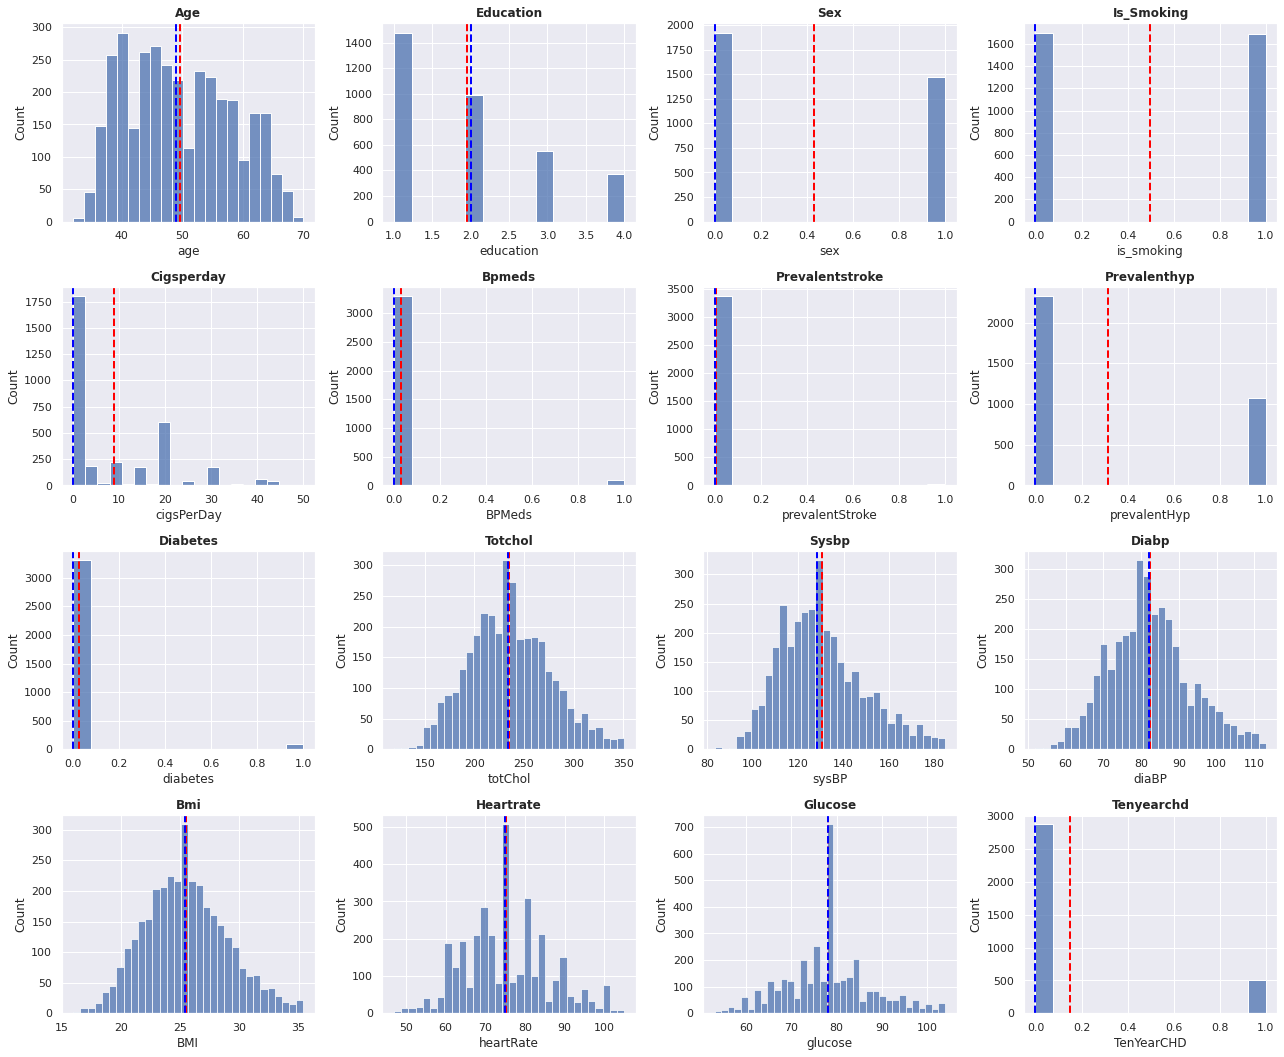

In [37]:
# Let's see the histplots of different columns in our dataset

plt.figure(figsize = (18,18))
for index, column in enumerate(independent_variable) :
  feature = cv_df[column]
  ax = plt.subplot(5,4,index+1)
  sns.histplot(feature)
  plt.axvline(cv_df[column].mean(), color = 'red', linestyle = 'dashed', linewidth = 2)
  plt.axvline(cv_df[column].median(), color = 'blue', linestyle = 'dashed', linewidth =2)
  plt.title(f'{column.title()}', weight = 'bold')
  plt.tight_layout()

###**Observations drawn from the histogram plots are as follows:**

* **Most of the people in the dataset are around 40 to 50 years old.**
* **Majority of the patients belongs to education level 1.**
* **There are more female patient compared to male in out dataset.**
* **There are almost equal number of smoker and non smoker in our dataset.**
* **Most of the patient smoke less than 10 Cigarette a day.**
* **100 Patient in the dataset are on blood pressure medication**
* **Only 22 patients in the dataset have encountered prevalent stroke.**
* **1069 patients in the dataset have encountered prevalent hypertension.**
* **Only 87 patients have Diabetes.**
* **'Total cholesterol', 'systolic blood pressure', 'diastolic blood pressure', 'BMI', 'Heartrate', 'Glucose' - these features appear to be normally distributed.**
* **As we can see  from above that very few number of people are having coronary heart disease, there is presence of class imbalance in the dataset.**

###**Bivariate analysis**

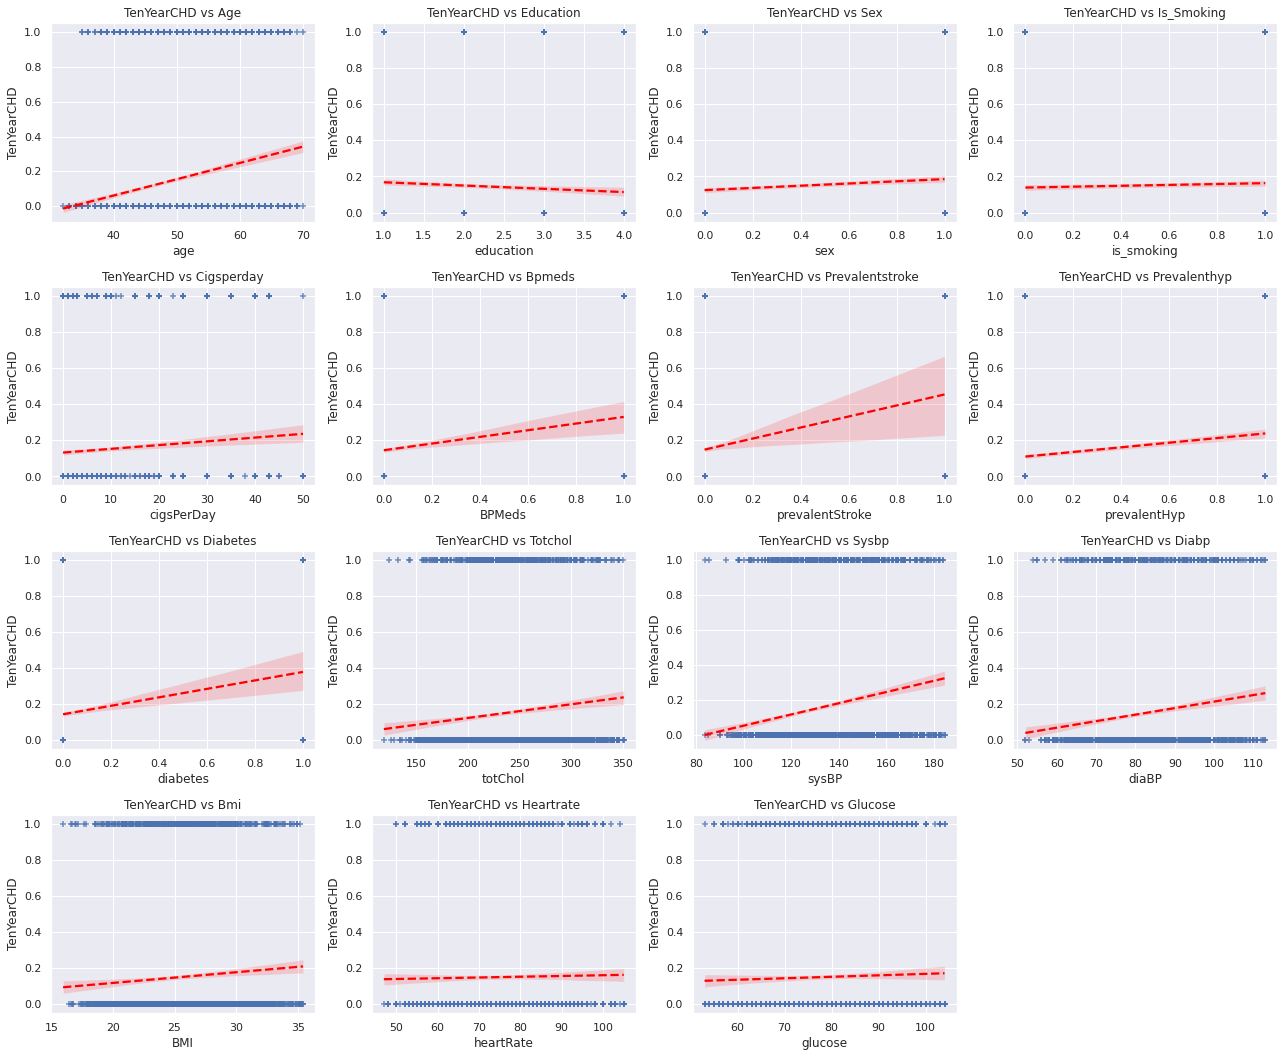

In [38]:
# Let's check linearity between our dependent and independent variable.

variables = [i for i in independent_variable if i not in ['TenYearCHD']]

plt.figure(figsize = (18,18))
for index, column in enumerate(variables) :
  plt.subplot(5,4,index+1)
  sns.regplot(data = cv_df, x = column, y = 'TenYearCHD', marker = '+' , line_kws = {'color' : 'red', 'linestyle':'--'})
  plt.title(f'TenYearCHD vs {column.title()}')
  plt.tight_layout()
plt.show();

###**Observations drawn from the scatter plots are as follows:**

* **Age is positively correlated with the risk of heart disease, if the age of a person increases then the risk of coronary heart disease increases.**
* **Female are less prone to heart disease , if the patient is male there is more chance of heart disease.**
* **If the consumption of cigarettes per day increases then also there is higher risk of heart disease.**
* **If patients have the history of BP Medication then also risk of heart disease increases.**
* **If patients have the history of Prevalent Stroke, Prevalent Hypertension, Diabetes, Total cholesterol, systolic blood pressure, diastolic blood pressure then the risk of heart disease increases.**
* **Patients with high BMI are prone to heart disease risk.**


###**Checking Multicolinearity**

**A Variance Inflation Factor (VIF) is the measure of amount of multicollinearity. It is predicted by taking a variable by regressing it against every other variable. VIF score of an independent variable represents how well the variable is explained by other variables.**

In [39]:
# Let's define function to calculate Variance Inflation Factor

def calculate_vif(X):
  
  vif = pd.DataFrame()
  vif['variables'] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return(vif.sort_values(by= 'VIF', ascending = False))

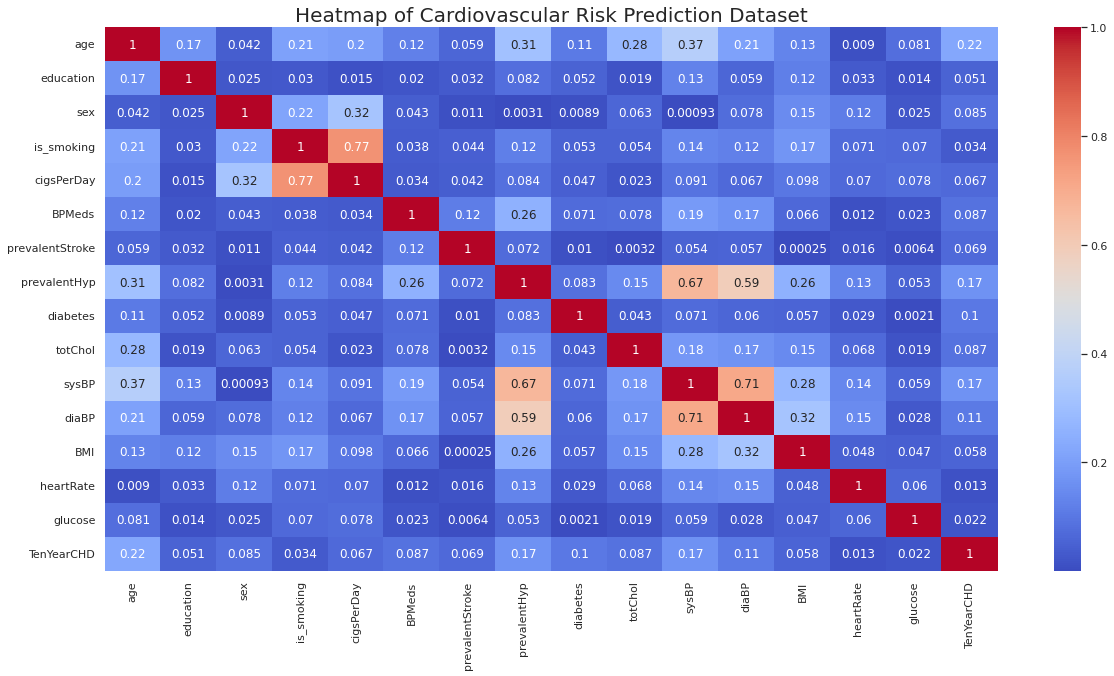

In [40]:
# Let's first check Correlation Heatmap

plt.figure(figsize = (20,10))
sns.heatmap(abs(cv_df.corr()), annot = True, cmap = 'coolwarm')
plt.title("Heatmap of Cardiovascular Risk Prediction Dataset",  fontsize  = 20)
plt.show();

**From above we can see that there are highly correlated features present like is_smoking and cigarettes per day and Systolic Blood Pressure and diastolic blood pressure are highly correlated with the prevalent hypertension, let's treat them by checking multicolinearity between different independent variables with the help of variance inflation factor.**

In [41]:
# Let's check VIF 

independent_variables = [i for i in cv_df.columns if i not in ['TenYearCHD']]
calculate_vif(cv_df[independent_variables])

,variables,VIF
10,sysBP,132.655302
11,diaBP,127.212212
12,BMI,58.866609
14,glucose,55.671761
13,heartRate,47.789265
0,age,42.772276
9,totChol,37.653008
3,is_smoking,4.954371
1,education,4.649621
4,cigsPerDay,4.194075


**From above it can be seen that the VIF values for various variables are very high , let's not consider them for further analysis.**

In [42]:
# Let's check rectified VIF 

calculate_vif(cv_df[[i for i in cv_df.columns if i not in ['TenYearCHD','diaBP','sysBP', 'glucose', 'BMI', 'totChol','is_smoking', 'heartRate']]])

,variables,VIF
0,age,5.381373
1,education,3.965520
2,sex,1.966446
3,cigsPerDay,1.734502
6,prevalentHyp,1.685134
4,BPMeds,1.120404
7,diabetes,1.044744
5,prevalentStroke,1.024797


**GREAT! Threshold values for VIF we had set as 5, as we can see from above the target is achieved.**

In [43]:
# Let's update the new independent variables 

independent_variables = [i for i in cv_df.columns if i not in ['TenYearCHD','diaBP','sysBP', 'glucose', 'BMI', 'totChol','is_smoking', 'heartRate']]

# Updating the dataset

updated_cvdf = cv_df[independent_variables + ['TenYearCHD']]

In [44]:
# Let's view the columns of the dataset

updated_cvdf .columns

Index(['age', 'education', 'sex', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'TenYearCHD'],
      dtype='object')

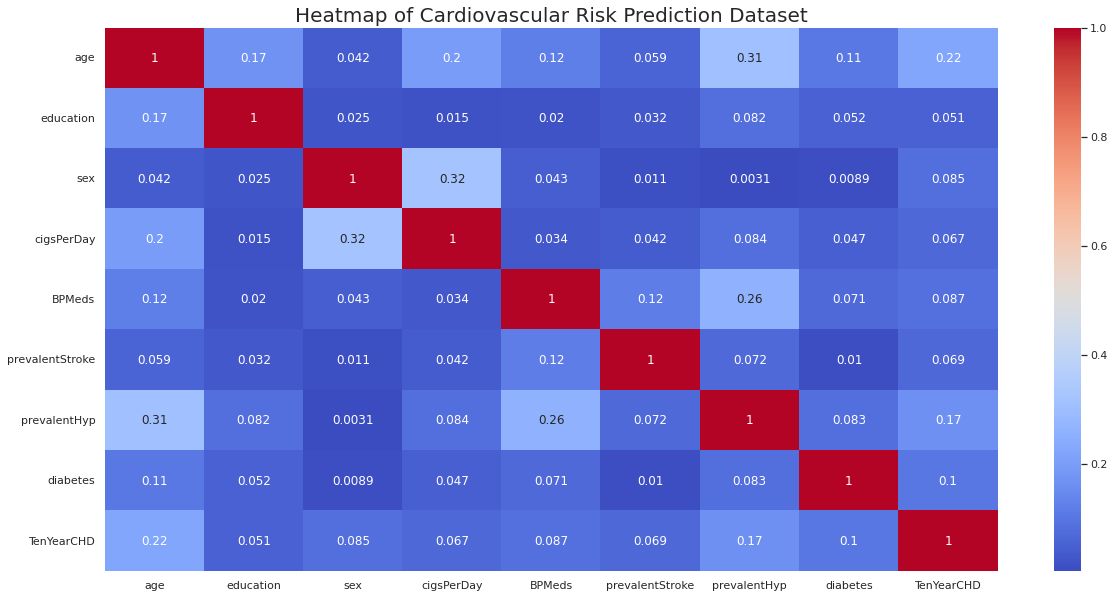

In [45]:
# Let's check Correlation Heatmap with updated dataset

plt.figure(figsize = (20,10))
sns.heatmap(abs(updated_cvdf.corr()), annot = True, cmap = 'coolwarm')
plt.title("Heatmap of Cardiovascular Risk Prediction Dataset",  fontsize  = 20)
plt.show();

* **As it can be seen from above that all highly correlated features have been removed from the dataset.**

#**Data Preprocessing**

##**Train - Test Split**

In [46]:
# Let's create variables to store independent features and dependent features

X = updated_cvdf[independent_variables]
y = updated_cvdf['TenYearCHD']

In [47]:
# Now let's split the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 0)

**Since the data is imbalanced Startified Split was employed to get almost equal proportion of dependent variables in train and test set.**

In [48]:
# Let's check the shape of the train and test dataset

print(f'The shape of the train and test set for the independent variables are : X_train = {X_train.shape}, X_test = {X_test.shape}')
print(f'The shape of the train and test set for the dependent variables are : y_train = {y_train.shape}, y_test = {y_test.shape}')

The shape of the train and test set for the independent variables are : X_train = (2712, 8), X_test = (678, 8)
The shape of the train and test set for the dependent variables are : y_train = (2712,), y_test = (678,)


In [49]:
# Checking the train distribution of dependent variable

y_train.value_counts()

0    2303
1     409
Name: TenYearCHD, dtype: int64

In [50]:
# Checking the test distribution of dependent variable

y_test.value_counts()

0    576
1    102
Name: TenYearCHD, dtype: int64

In [51]:
# Let's check the proportions for both train and test dataset

print('--'*34)
print('\n')
print(f'Proportion of positive outcome for train dataset : {409/(2303+409)}')
print(f'Proportion of positive outcome for test dataset : {102/(576+102)}')
print('\n')
print('--'*34)


--------------------------------------------------------------------


Proportion of positive outcome for train dataset : 0.15081120943952803
Proportion of positive outcome for test dataset : 0.1504424778761062


--------------------------------------------------------------------


* **As it can be seen that train and test set contains almost equal proportion of classes.**

##**Handling Class Imbalance**

**As it is already clear that here we are dealing with imbalanced data which is  ~15% of the patients , who were diagnosed with Coroary Heart Disease, we will handle this class imbalance problem with the help of SmoteTomek, it handles class imbalance by oversampling the train dataset followed by removing Tomek Links.**


**It ensures model has trained equally on all kind of result , it is not biased to one particular result.**

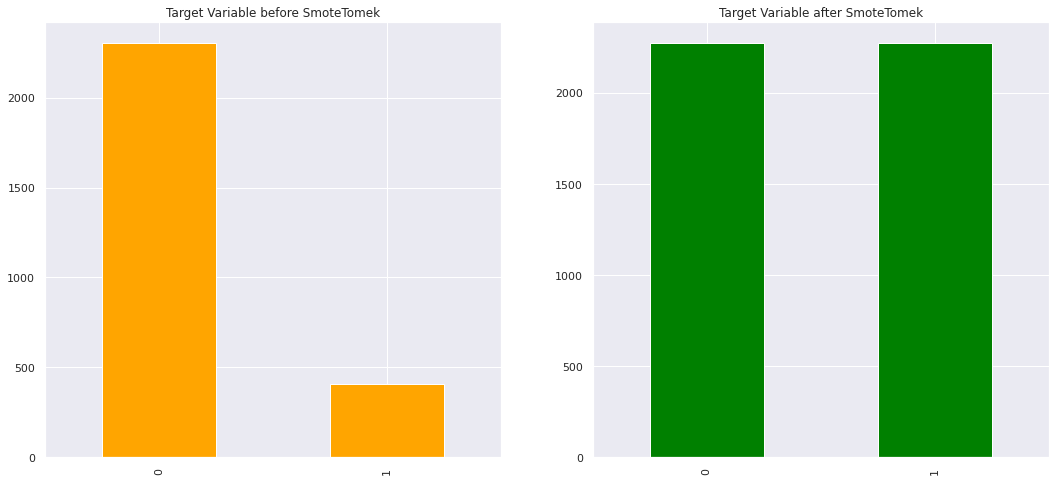

In [52]:
# Applying SmoteTomek and visualizing value counts of target variable

fig,axes = plt.subplots(1,2, figsize = (18,8))

# Let's plot the value count of both the classes before applying SmoteTomek

y_train.value_counts().plot(kind = 'bar',ax = axes[0] , title = 'Target Variable before SmoteTomek', color = 'orange')

# Let's fit predictor and target variable

X_smotetomek, y_smotetomek = SMOTETomek(random_state = 42).fit_resample(X_train, y_train)

# Let's plot the value count of both the classes after applying SmoteTomek

y_smotetomek.value_counts().plot(kind = 'bar',ax = axes[1] ,title = 'Target Variable after SmoteTomek' ,color = 'green')
plt.show();

In [53]:
# Let's check value counts of target variable before and after handling the class imbalance

print('before handling class imbalance :')
print(y_train.value_counts())
print('\n')
print('after handling class imbalance :')
print(y_smotetomek.value_counts())



before handling class imbalance :
0    2303
1     409
Name: TenYearCHD, dtype: int64


after handling class imbalance :
0    2271
1    2271
Name: TenYearCHD, dtype: int64


**We have successfully handled class imbalance, now the model will be able to learn from both the classes without any bias**

##**Scaling the Data**

**As we know that distance based algorithm will get impacted if features are in different range , though tree based algortihm will not be affected by different ranges of feature.**


**It is nesessary to scale different features to a specific range so that the algorithm must not be biased towards the feature which has values with higher magnitude.**

**We Can use MinMaxScaler to scale down the features.** 

In [54]:
# Let's Scale the independent variables

scaler = MinMaxScaler()

X_train_scale = scaler.fit_transform(X_train)
X_st_scale = scaler.fit_transform(X_smotetomek)
X_test_scale = scaler.transform(X_test)

In [55]:
# Let's convert the array to DataFrame

X_train_scale = pd.DataFrame(X_train_scale, columns = X_train.columns)
X_st_scale  = pd.DataFrame(X_st_scale, columns = X_smotetomek.columns)
X_test_scale = pd.DataFrame(X_test_scale, columns = X_test.columns)

In [56]:
#  Let's see scaled train value

X_train_scale.head()

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes
0,0.421053,0.000000,0.0,0.00,0.0,0.0,0.0,0.0
1,0.421053,0.000000,1.0,0.40,0.0,0.0,0.0,0.0
2,0.447368,0.333333,1.0,0.06,0.0,0.0,1.0,0.0
3,0.131579,0.000000,1.0,0.60,0.0,0.0,0.0,0.0
4,0.789474,0.666667,1.0,0.00,0.0,0.0,0.0,0.0


In [57]:
#  Let's see scaled SmoteTomek value

X_st_scale.head()

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes
0,0.421053,0.000000,0.0,0.00,0.0,0.0,0.0,0.0
1,0.421053,0.000000,1.0,0.40,0.0,0.0,0.0,0.0
2,0.447368,0.333333,1.0,0.06,0.0,0.0,1.0,0.0
3,0.131579,0.000000,1.0,0.60,0.0,0.0,0.0,0.0
4,0.789474,0.666667,1.0,0.00,0.0,0.0,0.0,0.0


In [58]:
#  Let's see scaled test value

X_test_scale.head()

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes
0,0.631579,0.333333,0.0,0.60,0.0,0.0,0.0,0.0
1,0.421053,0.000000,0.0,0.00,0.0,0.0,0.0,0.0
2,0.789474,0.000000,1.0,0.86,0.0,0.0,0.0,0.0
3,0.447368,1.000000,0.0,0.00,0.0,0.0,0.0,0.0
4,0.657895,0.333333,1.0,0.02,0.0,0.0,0.0,0.0


**We have successfully scaled down the values using MinMaxScaler.**

#**Machine Learning Model Implementation**

##**1. Logistic Regression**




**Logistic Regression** aims to measure the relationship between categorical dependent variable and one or more independent variable (usually continuous) by plotting the dependent variables' probability score.

In [59]:
# Logistic Regression Algorithm

lr = LogisticRegression(fit_intercept  = True, random_state = 1, max_iter = 1000)

# Hyperparameter grid

grid = { 'penalty' : ['l1', 'l2'],
         'C' : [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000 ]}

# Defining Scoring

scoring = make_scorer(f1_score, pos_label = 1)

# Gridsearch to find best parameters

lrg = GridSearchCV(lr, param_grid = grid, cv = 5, scoring = scoring )

# Training the classifier

lrg.fit(X_st_scale, y_smotetomek)

# Let's see the best parameters after applying gridsearch

lrg.best_params_

{'C': 0.1, 'penalty': 'l2'}

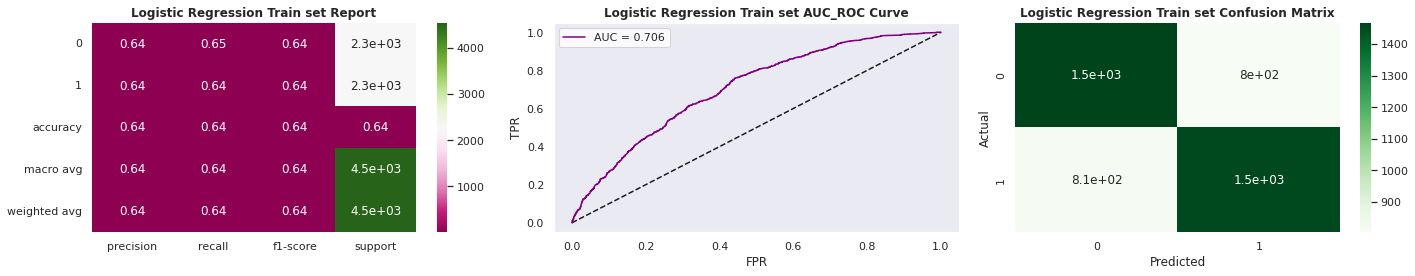

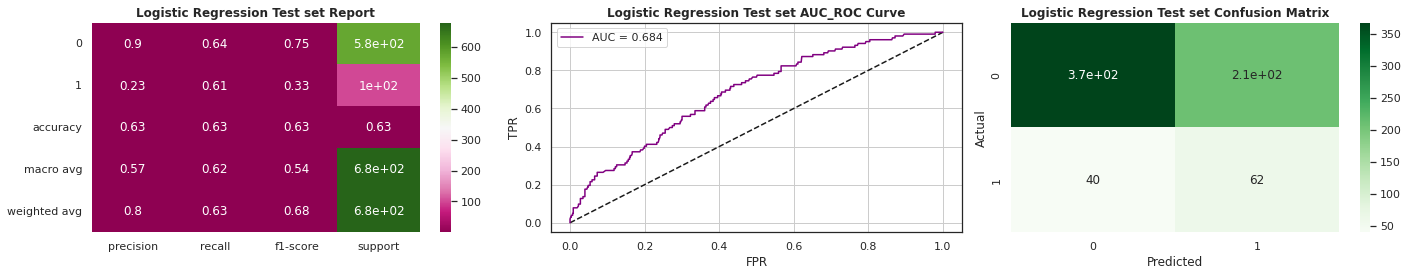

In [60]:
 
# Plotting the Evaluation Metrics for Logistic Regression model

for x , y_act, title in ((X_st_scale, y_smotetomek, 'Logistic Regression Train set'), (X_test_scale, y_test, 'Logistic Regression Test set')) :

# Predicting the target variable for both train and test set

    pred = lrg.predict(x)
    pred_proba = lrg.predict_proba(x)[:,1]
    report = pd.DataFrame(classification_report(y_pred=pred, y_true=y_act, output_dict=True))
    fpr, tpr, thresholds = roc_curve(y_act, pred_proba)

# Classification report for both train and test set of data

    plt.figure(figsize=(20,4))
    plt.subplot(1,3,1)
    sns.heatmap(report.T, annot=True, cmap = 'PiYG')
    plt.title(f'{title} Report', weight = 'bold')

# AUC_ROC Curve for both train and test set of data

    plt.subplot(1,3,2)
    sns.set_style ('white')
    plt.grid()
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}', color = 'purple')
    plt.legend(loc = 'upper left')
    plt.title(f'{title} AUC_ROC Curve', weight = 'bold')
    plt.xlabel('FPR')
    plt.ylabel('TPR')   
    
# Confusion Matrix for both train and test set of data

    plt.subplot(1,3,3)
    sns.heatmap(confusion_matrix(y_true=y_act, y_pred= pred), annot=True, cmap = 'Greens')
    plt.title(f'{title} Confusion Matrix', weight = 'bold')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')


    plt.tight_layout()

plt.show()


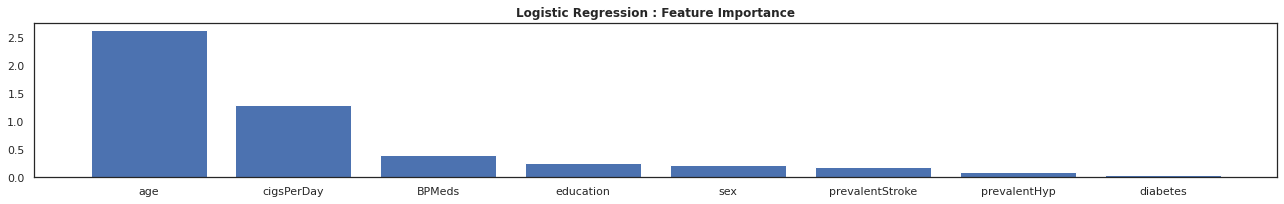

In [61]:
# Let's plot feature importance for Logistic Regression model

importance = np.abs(lrg.best_estimator_.coef_[0])
index = np.argsort(importance)
index = index[::-1]
plt.figure(figsize=(18,3))

plt.bar(range(len(index)), importance[index])
plt.xticks(range(len(index)),[independent_variables[i] for i in index])
plt.title('Logistic Regression : Feature Importance', weight =  'bold')
plt.tight_layout()
plt.show()

##**2. Decision Tree Classifier**

**Decision Tree** is a supervised machine learning technique, it is a tree structured classifier where internal nodes represent the features of the dataset, branches represent the decision rules and each leaf node represents the outcome.

It is called a decision tree because, similar to a tree, it starts with a root node, which expands on further branches and constructs a tree like structure.



In [62]:

# Let's make a Decision Tree model

dt = DecisionTreeClassifier(random_state = 2)

# Hyperparameter grid

grid1 = { 'max_depth' : [4,6,8,10,12],
         'min_samples_split' : [50,60,70,80],
         'min_samples_leaf' :[40,45,50,55,60]}

# Defining Scoring

scoring = make_scorer(f1_score, pos_label = 1)

# Gridsearch to find best parameters

dtg = GridSearchCV(dt, param_grid = grid1, cv = 5, scoring = scoring )

# Training the classifier

dtg.fit(X_st_scale, y_smotetomek)

# Let's see the best parameters after applying gridsearch

dtg.best_params_

{'max_depth': 4, 'min_samples_leaf': 55, 'min_samples_split': 50}

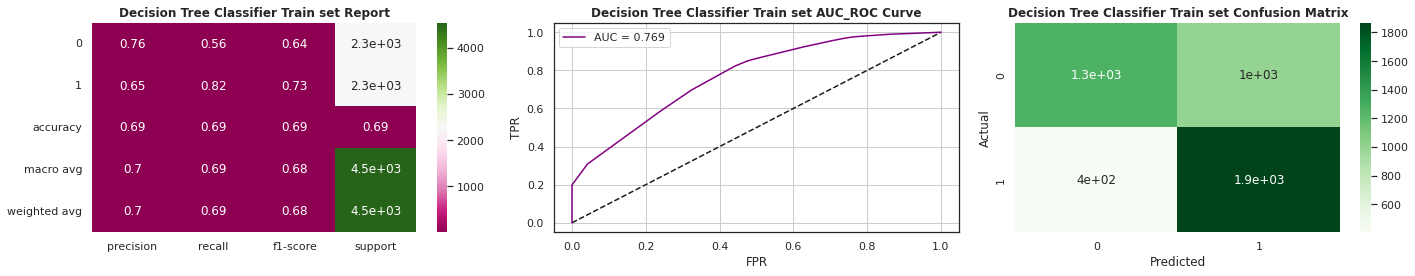

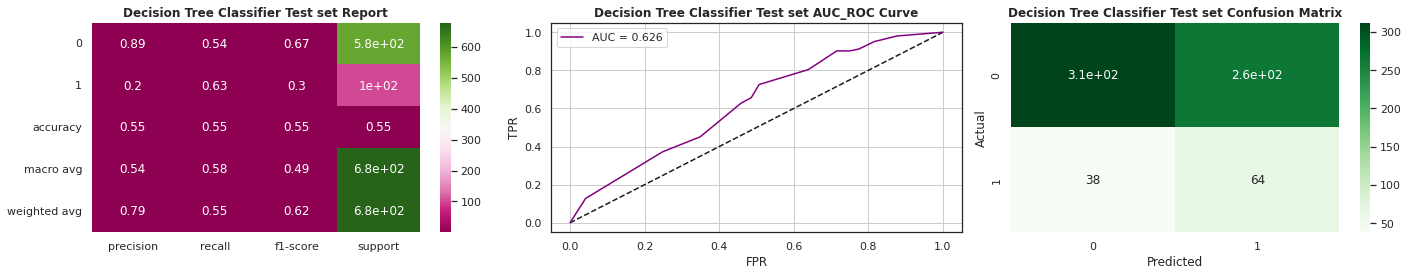

In [63]:
 
# Plotting the Evaluation Metrics for Decision Tree model

for x , y_act, title in ((X_st_scale, y_smotetomek, 'Decision Tree Classifier Train set'), (X_test_scale, y_test, 'Decision Tree Classifier Test set')) :

# Predicting the target variable for both train and test set

    pred = dtg.predict(x)
    pred_proba = dtg.predict_proba(x)[:,1]
    report = pd.DataFrame(classification_report(y_pred=pred, y_true=y_act, output_dict=True))
    fpr, tpr, thresholds = roc_curve(y_act, pred_proba)

# Classification report for both train and test set of data

    plt.figure(figsize=(20,4))
    plt.subplot(1,3,1)
    sns.heatmap(report.T, annot=True, cmap = 'PiYG')
    plt.title(f'{title} Report', weight = 'bold')

# AUC_ROC Curve for both train and test set of data

    plt.subplot(1,3,2)
    sns.set_style ('white')
    plt.grid()
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}', color = 'purple')
    plt.legend(loc = 'upper left')
    plt.title(f'{title} AUC_ROC Curve', weight = 'bold')
    plt.xlabel('FPR')
    plt.ylabel('TPR')   
    
# Confusion Matrix for both train and test set of data

    plt.subplot(1,3,3)
    sns.heatmap(confusion_matrix(y_true=y_act, y_pred= pred), annot=True, cmap = 'Greens')
    plt.title(f'{title} Confusion Matrix', weight = 'bold')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')


    plt.tight_layout()

plt.show()

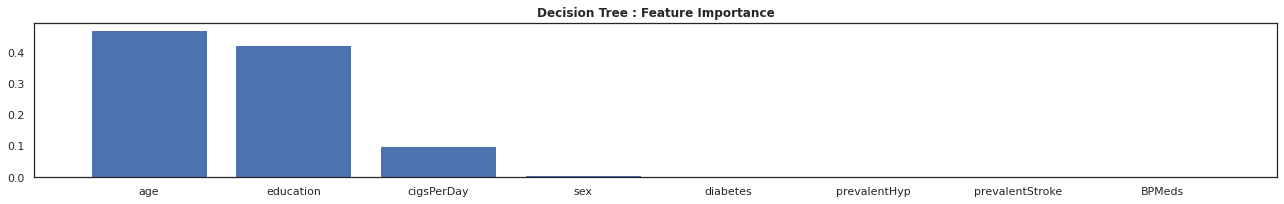

In [64]:
# Let's plot feature importance for Decision Tree model

importance = np.abs(dtg.best_estimator_.feature_importances_)
index = np.argsort(importance)
index = index[::-1]
plt.figure(figsize=(18,3))
plt.bar(range(len(index)), importance[index])
plt.xticks(range(len(index)),[independent_variables[i] for i in index])
plt.title('Decision Tree : Feature Importance', weight =  'bold')
plt.tight_layout()
plt.show()

##**3. Random Forest Classifier**

**Random Forest** are a way of averaging multiple deep decision trees, trained on different parts of same training set with a goal of reducing the variance but at a expense of small increase in bias and some loss of interpretability, but generally greatly boosts the performance in the final model.

In [65]:
# Let's make a Random Forest model

rf = RandomForestClassifier(random_state = 3)

# Hyperparameter grid

grid2 = {'n_estimators' : [100,125,150,200],
         'max_depth' : [4,6,8,10,12],
         'min_samples_split' : [50,60,70,80],
         'min_samples_leaf' : [45,50,55,60]}



# Defining Scoring

scoring = make_scorer(f1_score, pos_label = 1)

# Gridsearch to find best parameters

rfg = GridSearchCV(rf, param_grid = grid2, cv = 5, scoring = scoring )

# Training the classifier

rfg.fit(X_st_scale, y_smotetomek)

# Let's see the best parameters after applying gridsearch

rfg.best_params_





{'max_depth': 12,
 'min_samples_leaf': 45,
 'min_samples_split': 50,
 'n_estimators': 200}

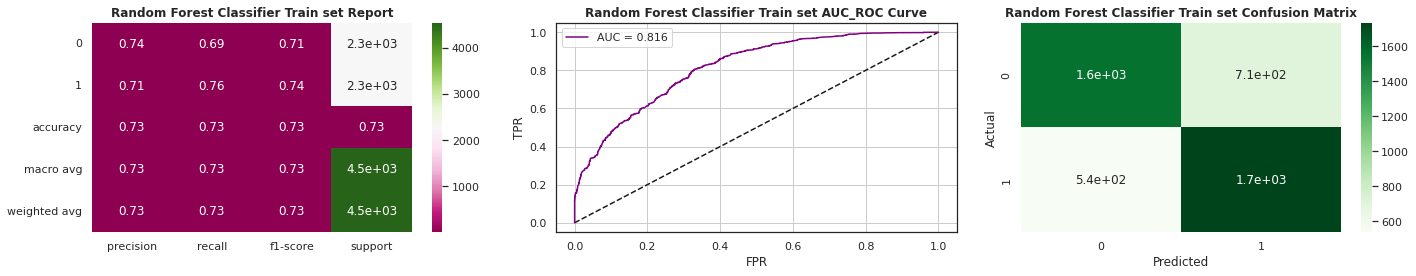

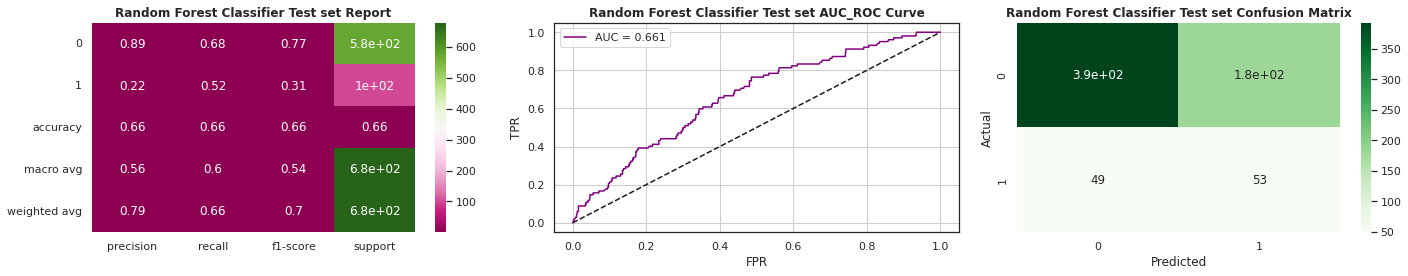

In [66]:
  
# Plotting the Evaluation Metrics for Random Forest model

for x , y_act, title in ((X_st_scale, y_smotetomek, 'Random Forest Classifier Train set'), (X_test_scale, y_test, 'Random Forest Classifier Test set')) :

# Predicting the target variable for both train and test set

    pred = rfg.predict(x)
    pred_proba = rfg.predict_proba(x)[:,1]
    report = pd.DataFrame(classification_report(y_pred=pred, y_true=y_act, output_dict=True))
    fpr, tpr, thresholds = roc_curve(y_act, pred_proba)

# Classification report for both train and test set of data

    plt.figure(figsize=(20,4))
    plt.subplot(1,3,1)
    sns.heatmap(report.T, annot=True, cmap = 'PiYG')
    plt.title(f'{title} Report', weight = 'bold')

# AUC_ROC Curve for both train and test set of data

    plt.subplot(1,3,2)
    sns.set_style ('white')
    plt.grid()
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}', color = 'purple')
    plt.legend(loc = 'upper left')
    plt.title(f'{title} AUC_ROC Curve', weight = 'bold')
    plt.xlabel('FPR')
    plt.ylabel('TPR')   
    
# Confusion Matrix for both train and test set of data

    plt.subplot(1,3,3)
    sns.heatmap(confusion_matrix(y_true=y_act, y_pred= pred), annot=True, cmap = 'Greens')
    plt.title(f'{title} Confusion Matrix', weight = 'bold')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')


    plt.tight_layout()

plt.show()

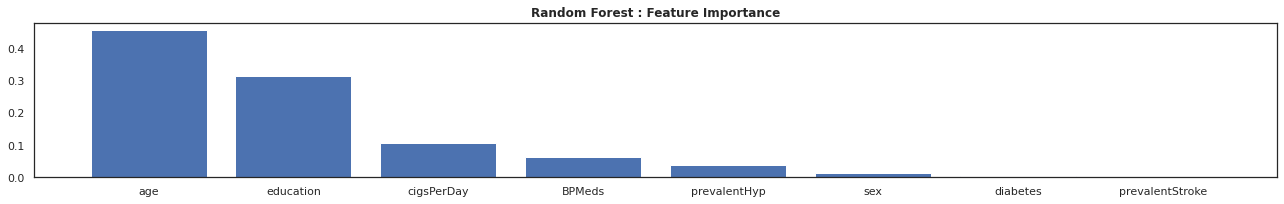

In [67]:
# Let's plot feature importance for  model

importance = np.abs(rfg.best_estimator_.feature_importances_)
index = np.argsort(importance)
index = index[::-1]
plt.figure(figsize=(18,3))
plt.bar(range(len(index)), importance[index])
plt.xticks(range(len(index)),[independent_variables[i] for i in index])
plt.title('Random Forest : Feature Importance', weight =  'bold')
plt.tight_layout()
plt.show()

##**4. XGBoost Classifier**

In [125]:
# Let's make a XGBoost model

xgb = XGBClassifier(objective='binary:logistic',colsample_bytree = 0.7, learning_rate = 0.01,
                max_depth = 4,  n_estimators = 14, subsample=0.5)


# Training the classifier

xgb.fit(X_st_scale, y_smotetomek)




XGBClassifier(colsample_bytree=0.7, learning_rate=0.01, max_depth=4,
              n_estimators=14, subsample=0.5)

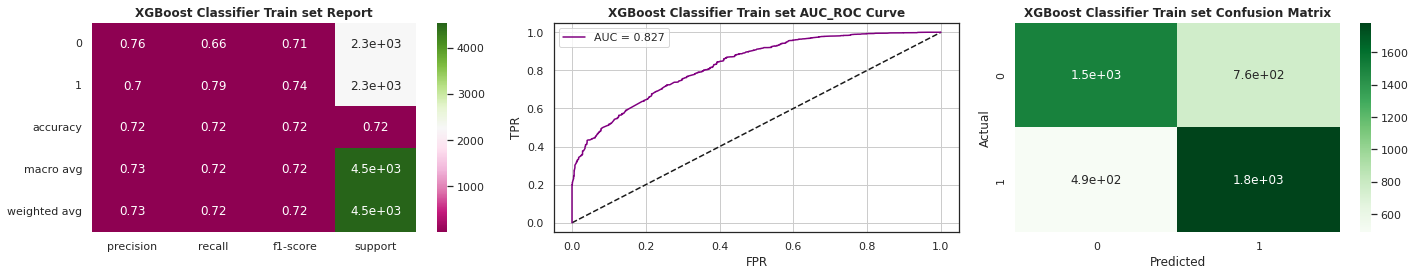

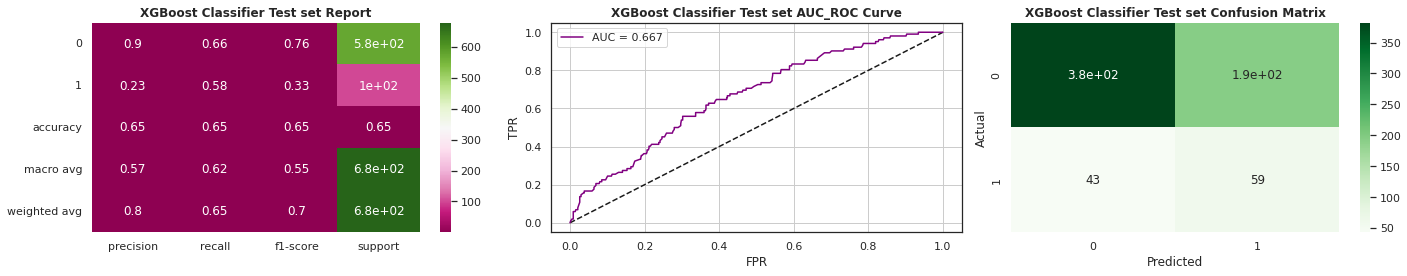

In [126]:
  
# Plotting the Evaluation Metrics for Random Forest model

for x , y_act, title in ((X_st_scale, y_smotetomek, 'XGBoost Classifier Train set'), (X_test_scale, y_test, 'XGBoost Classifier Test set')) :

# Predicting the target variable for both train and test set

    pred = xgb.predict(x)
    pred_proba = xgb.predict_proba(x)[:,1]
    report = pd.DataFrame(classification_report(y_pred=pred, y_true=y_act, output_dict=True))
    fpr, tpr, thresholds = roc_curve(y_act, pred_proba)

# Classification report for both train and test set of data

    plt.figure(figsize=(20,4))
    plt.subplot(1,3,1)
    sns.heatmap(report.T, annot=True, cmap = 'PiYG')
    plt.title(f'{title} Report', weight = 'bold')

# AUC_ROC Curve for both train and test set of data

    plt.subplot(1,3,2)
    sns.set_style ('white')
    plt.grid()
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}', color = 'purple')
    plt.legend(loc = 'upper left')
    plt.title(f'{title} AUC_ROC Curve', weight = 'bold')
    plt.xlabel('FPR')
    plt.ylabel('TPR')   
    
# Confusion Matrix for both train and test set of data

    plt.subplot(1,3,3)
    sns.heatmap(confusion_matrix(y_true=y_act, y_pred= pred), annot=True, cmap = 'Greens')
    plt.title(f'{title} Confusion Matrix', weight = 'bold')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')


    plt.tight_layout()

plt.show()

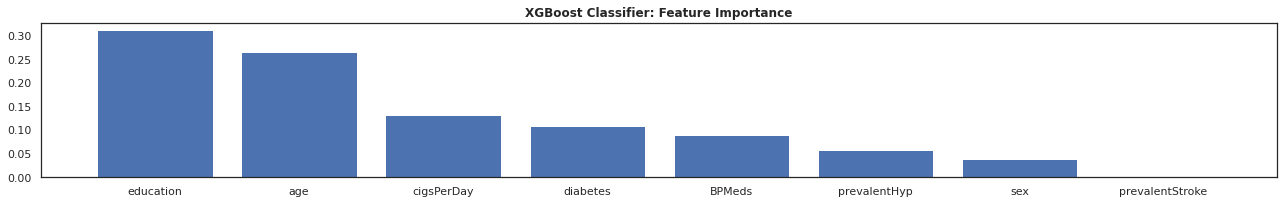

In [70]:
# Let's plot feature importance for  model

importance = np.abs(xgb.feature_importances_)
index = np.argsort(importance)
index = index[::-1]
plt.figure(figsize=(18,3))
plt.bar(range(len(index)), importance[index])
plt.xticks(range(len(index)),[independent_variables[i] for i in index])
plt.title('XGBoost Classifier: Feature Importance', weight =  'bold')
plt.tight_layout()
plt.show()

##**5. Support Vector Classifier**

In [71]:

# Let's make a SVM model

svm = SVC(probability = True, random_state = 4)


# Hyperparameter grid

grid4 = {'kernel' : ['linear', 'rbf', 'poly', 'sigmoid'],
         'C' : [0.01,0.1,1,10,100],
         'gamma' : [0.001,0.01,0.1,1,10],
         'max_iter' : [1000]
         }



# Defining Scoring

scoring = make_scorer(f1_score, pos_label = 1)

# Gridsearch to find best parameters

svmg = GridSearchCV(svm, param_grid = grid4, cv = 5, scoring = scoring )
 
# Training the classifier

svmg.fit(X_st_scale, y_smotetomek)

# Let's see the best parameters after applying gridsearch

svmg.best_params_




{'C': 0.1, 'gamma': 10, 'kernel': 'rbf', 'max_iter': 1000}

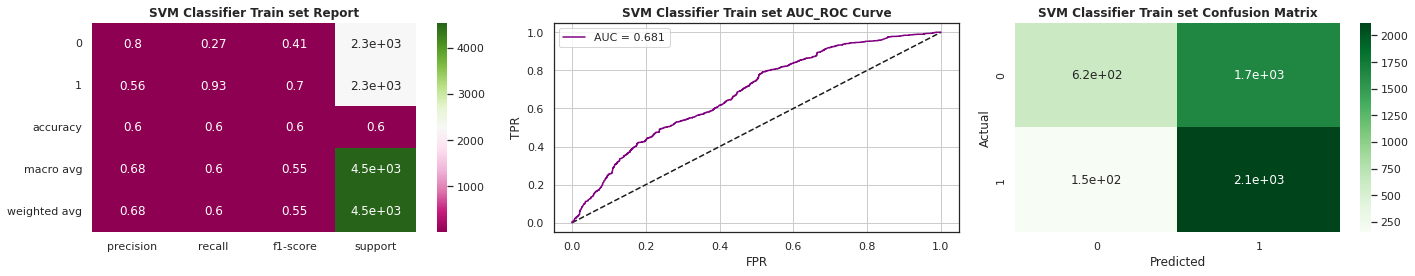

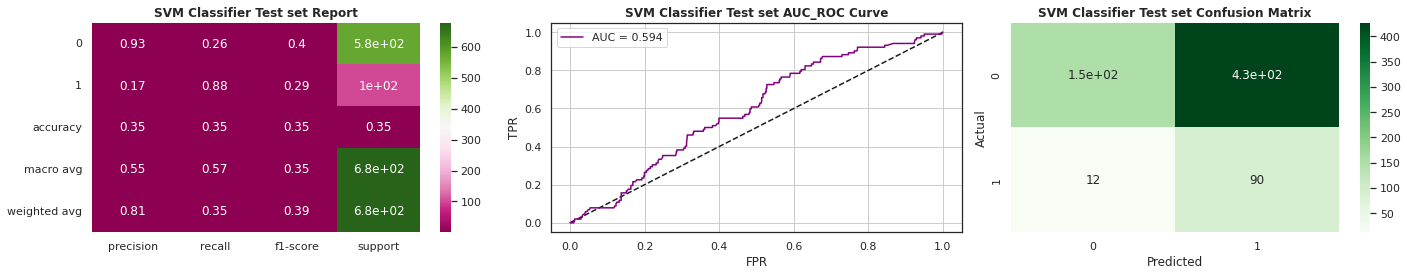

In [72]:
  
# Plotting the Evaluation Metrics for Random Forest model

for x , y_act, title in ((X_st_scale, y_smotetomek, 'SVM Classifier Train set'), (X_test_scale, y_test, 'SVM Classifier Test set')) :

# Predicting the target variable for both train and test set

    pred = svmg.predict(x)
    pred_proba = svmg.predict_proba(x)[:,1]
    report = pd.DataFrame(classification_report(y_pred=pred, y_true=y_act, output_dict=True))
    fpr, tpr, thresholds = roc_curve(y_act, pred_proba)

# Classification report for both train and test set of data

    plt.figure(figsize=(20,4))
    plt.subplot(1,3,1)
    sns.heatmap(report.T, annot=True, cmap = 'PiYG')
    plt.title(f'{title} Report', weight = 'bold')

# AUC_ROC Curve for both train and test set of data

    plt.subplot(1,3,2)
    sns.set_style ('white')
    plt.grid()
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}', color = 'purple')
    plt.legend(loc = 'upper left')
    plt.title(f'{title} AUC_ROC Curve', weight = 'bold')
    plt.xlabel('FPR')
    plt.ylabel('TPR')   
    
# Confusion Matrix for both train and test set of data

    plt.subplot(1,3,3)
    sns.heatmap(confusion_matrix(y_true=y_act, y_pred= pred), annot=True, cmap = 'Greens')
    plt.title(f'{title} Confusion Matrix', weight = 'bold')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
 

    plt.tight_layout()

plt.show()

##**6. K-Nearest Neighbors**



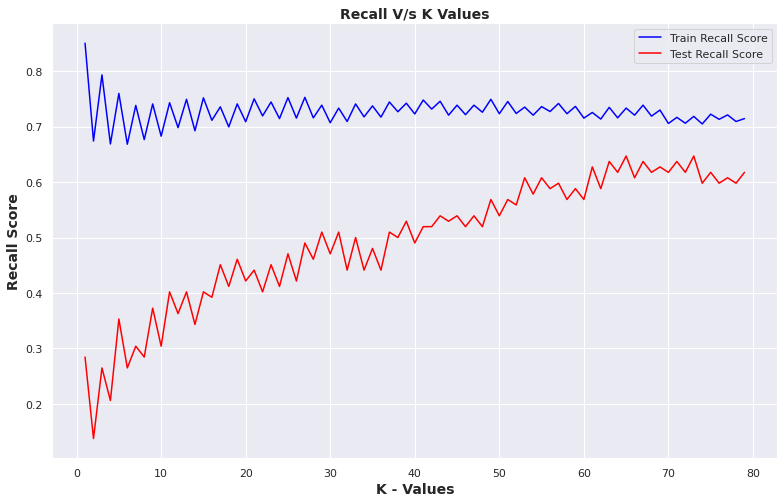

In [128]:
# Let's get the optimum k value


plt.figure(figsize = (13,8))
sns.set(style = 'darkgrid')
knn_test = []
knn_train = []
for k in range(1,80) :
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_st_scale, y_smotetomek)
  knn_train_pred = knn.predict(X_st_scale) 
  knn_train_recall = recall_score(y_smotetomek, knn_train_pred)
  knn_test_pred = knn.predict(X_test_scale) 
  knn_test_recall = recall_score(y_test, knn_test_pred)
  knn_test.append(knn_test_recall)
  knn_train.append(knn_train_recall)

# Plotting Recall V/s K Values

x1 = range (1,80)
y1 = knn_train
y2 = knn_test
plt.plot(x1,y1, label = 'Train Recall Score', color = 'blue')
plt.plot(x1,y2, label = 'Test Recall Score', color = 'red')
plt.title ('Recall V/s K Values', weight = 'bold', fontsize = 14)
plt.xlabel('K - Values', weight = 'bold', fontsize = 14)
plt.ylabel('Recall Score', weight = 'bold', fontsize = 14)
plt.legend()
plt.show()

In [114]:

# Hyperparameter grid

grid5 = {'n_neighbors' : range(60,80),
         
         'metric' : ['minkowski', 'euclidean', 'manhattan']}


# Defining Scoring

scoring = make_scorer(f1_score, pos_label = 1)

# Gridsearch to find best parameters

knng = GridSearchCV(knn , param_grid = grid5, cv = 5, scoring = scoring)
 
# Training the classifier

knng.fit(X_st_scale, y_smotetomek)

# Let's see the best parameters after applying gridsearch

knng.best_params_




{'metric': 'manhattan', 'n_neighbors': 73}

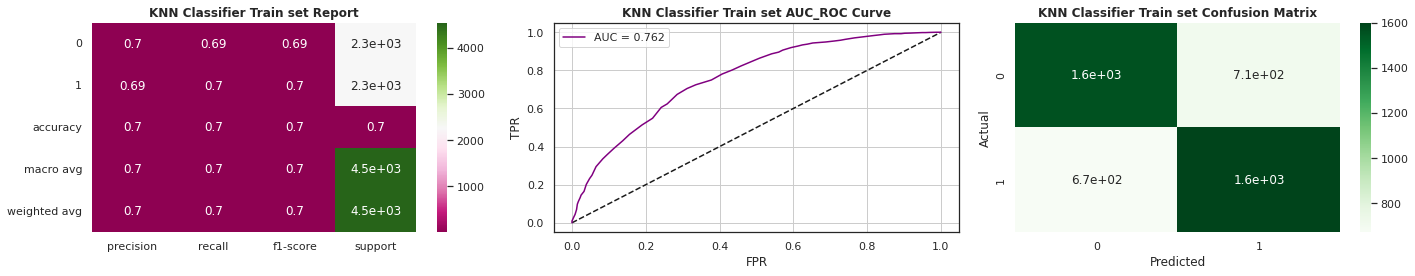

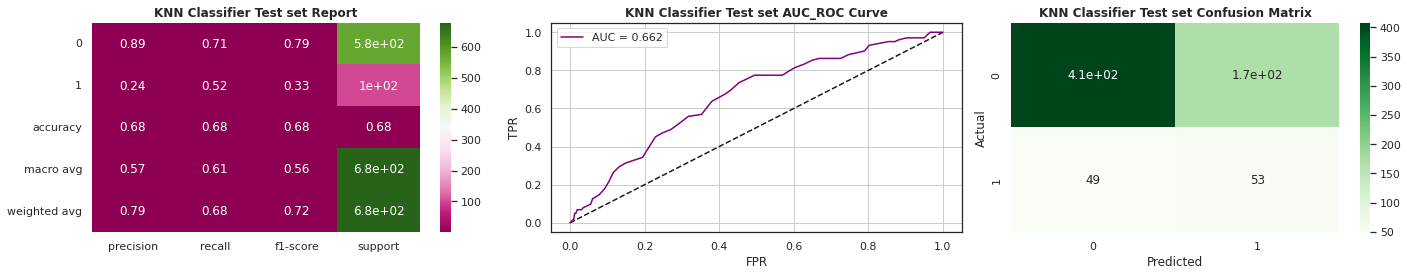

In [115]:
  
# Plotting the Evaluation Metrics for Random Forest model

for x , y_act, title in ((X_st_scale, y_smotetomek, 'KNN Classifier Train set'), (X_test_scale, y_test, 'KNN Classifier Test set')) :

# Predicting the target variable for both train and test set

    pred = knng.predict(x)
    pred_proba = knng.predict_proba(x)[:,1]
    report = pd.DataFrame(classification_report(y_pred=pred, y_true=y_act, output_dict=True))
    fpr, tpr, thresholds = roc_curve(y_act, pred_proba)

# Classification report for both train and test set of data

    plt.figure(figsize=(20,4))
    plt.subplot(1,3,1)
    sns.heatmap(report.T, annot=True, cmap = 'PiYG')
    plt.title(f'{title} Report', weight = 'bold')

# AUC_ROC Curve for both train and test set of data

    plt.subplot(1,3,2)
    sns.set_style ('white')
    plt.grid()
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}', color = 'purple')
    plt.legend(loc = 'upper left')
    plt.title(f'{title} AUC_ROC Curve', weight = 'bold')
    plt.xlabel('FPR')
    plt.ylabel('TPR')   
    
# Confusion Matrix for both train and test set of data

    plt.subplot(1,3,3)
    sns.heatmap(confusion_matrix(y_true=y_act, y_pred= pred), annot=True, cmap = 'Greens')
    plt.title(f'{title} Confusion Matrix', weight = 'bold')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
 

    plt.tight_layout()

plt.show()

##**7. Naive Bayes Classifier**

In [130]:
# Let's make a Random Forest model

nbc = GaussianNB()

# Training the classifier

nbc.fit(X_st_scale, y_smotetomek)



GaussianNB()

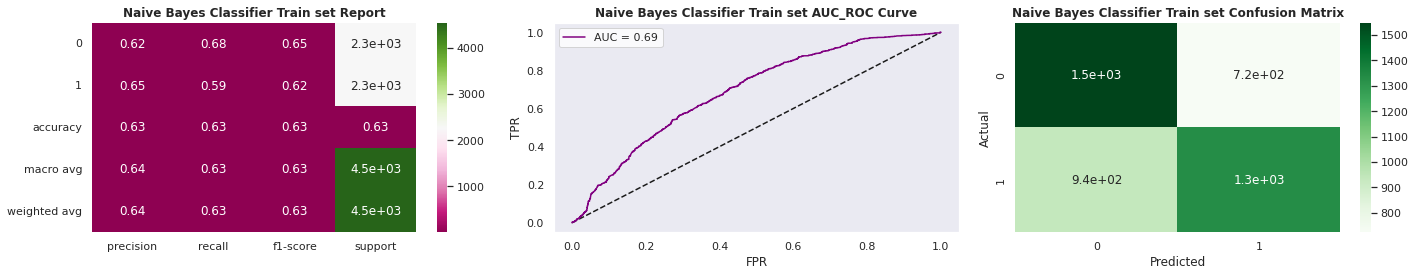

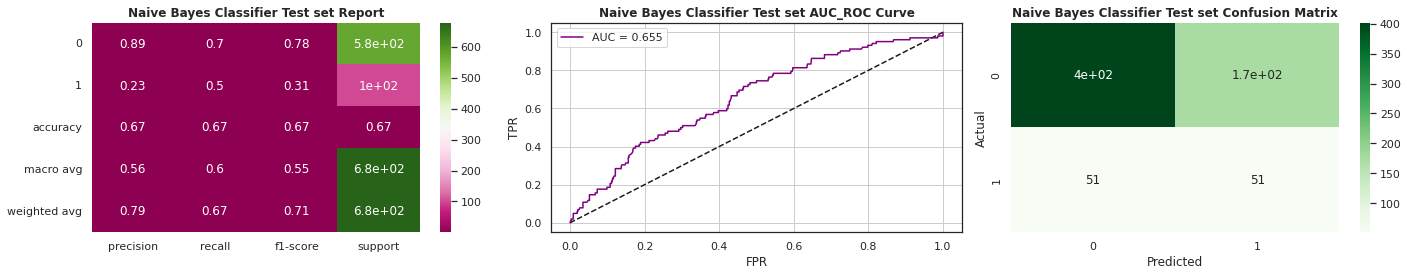

In [122]:
  
# Plotting the Evaluation Metrics for Random Forest model

for x , y_act, title in ((X_st_scale, y_smotetomek, 'Naive Bayes Classifier Train set'), (X_test_scale, y_test, 'Naive Bayes Classifier Test set')) :

# Predicting the target variable for both train and test set

    pred = nbc.predict(x)
    pred_proba = nbc.predict_proba(x)[:,1]
    report = pd.DataFrame(classification_report(y_pred=pred, y_true=y_act, output_dict=True))
    fpr, tpr, thresholds = roc_curve(y_act, pred_proba)

# Classification report for both train and test set of data

    plt.figure(figsize=(20,4))
    plt.subplot(1,3,1)
    sns.heatmap(report.T, annot=True, cmap = 'PiYG')
    plt.title(f'{title} Report', weight = 'bold')

# AUC_ROC Curve for both train and test set of data

    plt.subplot(1,3,2)
    sns.set_style ('white')
    plt.grid()
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}', color = 'purple')
    plt.legend(loc = 'upper left')
    plt.title(f'{title} AUC_ROC Curve', weight = 'bold')
    plt.xlabel('FPR')
    plt.ylabel('TPR')   
    
# Confusion Matrix for both train and test set of data

    plt.subplot(1,3,3)
    sns.heatmap(confusion_matrix(y_true=y_act, y_pred= pred), annot=True, cmap = 'Greens')
    plt.title(f'{title} Confusion Matrix', weight = 'bold')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
 

    plt.tight_layout()

plt.show()